In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests 
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!conda install -c conda-forge folium
import folium # map rendering library
from IPython.display import HTML
import time

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.0               |             py_0          26 KB  conda-forge
    folium-0.10.1              |             py_0          59 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTAL

<h3>Loading and Preparing the Neighborhoods Data for New York</h3>
Extracting Neighborhoods Data from a Relevant Page

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset

In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [5]:
nyc_neighborhoods_data = newyork_data['features']
nyc_neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

<b>Transforming the JSON Data into a Pandas Dataframe</b>

In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
nyc_neighborhoods = pd.DataFrame(columns=column_names)

for data in nyc_neighborhoods_data:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    nyc_neighborhoods = nyc_neighborhoods.append({'Borough': borough,
                                                  'Neighborhood': neighborhood_name,
                                                  'Latitude': neighborhood_lat,
                                                  'Longitude': neighborhood_lon}, ignore_index=True)

In [7]:
nyc_neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [8]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(nyc_neighborhoods['Borough'].unique()),
        nyc_neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


<b>Using geopy Library to get the Coordinates of New York City</b>

In [9]:
address = 'New York City, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


<b>Creating a Map of New York City with neighborhoods Superimposed on Top </b>

In [10]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10, 
                         min_zoom=9, max_zoom=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(nyc_neighborhoods['Latitude'], 
                                           nyc_neighborhoods['Longitude'], 
                                           nyc_neighborhoods['Borough'], 
                                           nyc_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        weight=2,
        color='#333333',
        fill=True,
        fill_color='#ffb300',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [11]:
# The code was removed by Watson Studio for sharing.

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    """
    A function that retrieves information about venues in each neighborhood.
    It takes as input a list of the names of the neighborhoods, a list of 
    their latitudes, and a list of their longitudes.
    It returns a dataframe with information about each neighborhood and its venues.
    """
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = ('https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}'
               '&v={}&ll={},{}&intent=browse&radius={}&limit={}'
               .format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT))
            
        # make the GET request
        results = requests.get(url).json()["response"]["venues"]
            
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng, v['name'], v['location']['lat'], 
                             v['location']['lng'], v['categories'][0]['name']) 
                            for v in results if len(v['categories']) > 0])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 
                             'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

In [13]:
nyc_venues = getNearbyVenues(names=nyc_neighborhoods['Neighborhood'],
                             latitudes=nyc_neighborhoods['Latitude'],
                             longitudes=nyc_neighborhoods['Longitude']
                            )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [14]:
# Removing records where venue is "building" or "office" or "Bus Stop" as we will using venues for comparison
nyc_venues = nyc_venues[~nyc_venues['Venue Category'].isin(['Building', 'Office', 'Bus Line', 'Bus Stop','Bus Station','Road'])]
print(nyc_venues.shape)
nyc_venues.head()

(23783, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

                Venue  Venue Latitude  Venue Longitude     Venue Category  
0               Shell       40.894187       -73.845862        Gas Station  
1         Pitman Deli       40.894149       -73.845748               Food  
2    Carvel Ice Cream       40.890487       -73.848568     Ice Cream Shop  
3    Lollipops Gelato       40.894123       -73.845892       Dessert Shop  
4  Pittman Ave bodega       40.894241       -73.845763  Convenience Store

Let's check how many venues were returned for each neighborhood

In [14]:
nyc_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
Allerton                                      93                      93   
Annadale                                      82                      82   
Arden Heights                                 79                      79   
Arlington                                     87                      87   
Arrochar                                      90                      90   
Arverne                                       96                      96   
Astoria                                       85                      85   
Astoria Heights                               81                      81   
Auburndale                                    68                      68   
Bath Beach                                    94                      94   
Battery Park City                             95                      95   
Bay Ridge                                     89                      89   
Bay Terrace                                  178                     178   
Baychester                                    91                      91   
Bayside                                       89                      89   
Bayswater                                     92                      92   
Bedford Park                                  90                      90   
Bedford Stuyvesant                            94                      94   
Beechhurst                                    99                      99   
Bellaire                                      88                      88   
Belle Harbor                                  89                      89   
Bellerose                                     91                      91   
Belmont                                       64                      64   
Bensonhurst                                   88                      88   
Bergen Beach                                  87                      87   
Blissville                                    98                      98   
Bloomfield                                    93                      93   
Boerum Hill                                   94                      94   
Borough Park                                  40                      40   
Breezy Point                                  79                      79   
Briarwood                                     80                      80   
Brighton Beach                                95                      95   
Broad Channel                                 96                      96   
Broadway Junction                             91                      91   
Bronxdale                                     74                      74   
Brooklyn Heights                              46                      46   
Brookville                                    84                      84   
Brownsville                                   95                      95   
Bulls Head                                    82                      82   
Bushwick                                      77                      77   
Butler Manor                                  79                      79   
Cambria Heights                               89                      89   
Canarsie                                      76                      76   
Carnegie Hill                                 95                      95   
Carroll Gardens                               87                      87   
Castle Hill                                   93                      93   
Castleton Corners                             90                      90   
Central Harlem                                94                      94   
Charleston                                    92                      92   
Chelsea                                      176                     176   
Chinatown                                     98                      98   

In [16]:
nyc_neighborhoods.shape[0], nyc_venues['Neighborhood'].unique().shape[0]

(306, 302)

We notice that there are 302 neighborhoods in the table while we had 306 neighborhoods before we got the data from Foursquare. This means that Foursquare didn't return any venue for a few neighborhoods.

In [17]:
nyc_excluded_neighborhoods = set(nyc_neighborhoods['Neighborhood']).difference(nyc_venues['Neighborhood'])
nyc_excluded_neighborhoods

set()

<b>Let's find out how many unique categories can be curated from all the returned venues</b>

In [19]:
print('There are {} uniques categories.'.format(len(nyc_venues['Venue Category'].unique())))

There are 583 uniques categories.


In [20]:
# one hot encoding
nyc_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
# we used Neighborhood_" instead of just "Neighborhood" because
# there is a venue category called "Neighborhood"
nyc_onehot['Neighborhood_'] = nyc_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [nyc_onehot.columns[-1]] + list(nyc_onehot.columns[:-1])
nyc_onehot = nyc_onehot[fixed_columns]

nyc_onehot.head()

Neighborhood_  ATM  Accessories Store  Acupuncturist  Adult Boutique  \
0     Wakefield    0                  0              0               0   
1     Wakefield    0                  0              0               0   
2     Wakefield    0                  0              0               0   
3     Wakefield    0                  0              0               0   
4     Wakefield    0                  0              0               0   

   Advertising Agency  Afghan Restaurant  African Restaurant  Airport  \
0                   0                  0                   0        0   
1                   0                  0                   0        0   
2                   0                  0                   0        0   
3                   0                  0                   0        0   
4                   0                  0                   0        0   

   Airport Gate  Airport Terminal  Airport Tram  Alternative Healer  \
0             0                 0             0                   0   
1             0                 0             0                   0   
2             0                 0             0                   0   
3             0                 0             0                   0   
4             0                 0             0                   0   

   American Restaurant  Animal Shelter  Antique Shop  Arcade  \
0                    0               0             0       0   
1                    0               0             0       0   
2                    0               0             0       0   
3                    0               0             0       0   
4                    0               0             0       0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0                 0                       0            0           0   
1                 0                       0            0           0   
2                 0                       0            0           0   
3                 0                       0            0           0   
4                 0                       0            0           0   

   Art Studio  Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0           0                    0                     0                 0   
1           0                    0                     0                 0   
2           0                    0                     0                 0   
3           0                    0                     0                 0   
4           0                    0                     0                 0   

   Assisted Living  Astrologer  Athletics & Sports  Auditorium  \
0                0           0                   0           0   
1                0           0                   0           0   
2                0           0                   0           0   
3                0           0                   0           0   
4                0           0                   0           0   

   Australian Restaurant  Auto Dealership  Auto Garage  Auto Workshop  \
0                      0                0            0              0   
1                      0                0            0              0   
2                      0                0            0              0   
3                      0                0            0              0   
4                      0                0            0              0   

   Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Baggage Claim  \
0                0          0           0           0              0   
1                0          0           0           0              0   
2                0          0           0           0              0   
3                0          0           0           0              0   
4                0          0           0           0              0   

   Baggage Locker  Bakery  Ballroom  Bank  Bar  Baseball Field  \
0               0       0         0     0    0               0   
1  

<b>Grouping rows by neighborhood and taking the mean of the frequency of occurrence of each category for each neighborhood</b>

In [22]:
nyc_grouped = nyc_onehot.groupby('Neighborhood_').mean().reset_index()
nyc_grouped.head()

Neighborhood_  ATM  Accessories Store  Acupuncturist  Adult Boutique  \
0       Allerton  0.0                0.0            0.0             0.0   
1       Annadale  0.0                0.0            0.0             0.0   
2  Arden Heights  0.0                0.0            0.0             0.0   
3      Arlington  0.0                0.0            0.0             0.0   
4       Arrochar  0.0                0.0            0.0             0.0   

   Advertising Agency  Afghan Restaurant  African Restaurant  Airport  \
0                 0.0                0.0                 0.0      0.0   
1                 0.0                0.0                 0.0      0.0   
2                 0.0                0.0                 0.0      0.0   
3                 0.0                0.0                 0.0      0.0   
4                 0.0                0.0                 0.0      0.0   

   Airport Gate  Airport Terminal  Airport Tram  Alternative Healer  \
0           0.0               0.0           0.0                 0.0   
1           0.0               0.0           0.0                 0.0   
2           0.0               0.0           0.0                 0.0   
3           0.0               0.0           0.0                 0.0   
4           0.0               0.0           0.0                 0.0   

   American Restaurant  Animal Shelter  Antique Shop    Arcade  \
0             0.000000             0.0           0.0  0.000000   
1             0.036585             0.0           0.0  0.000000   
2             0.000000             0.0           0.0  0.000000   
3             0.011494             0.0           0.0  0.011494   
4             0.000000             0.0           0.0  0.000000   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0               0.0                     0.0          0.0         0.0   
1               0.0                     0.0          0.0         0.0   
2               0.0                     0.0          0.0         0.0   
3               0.0                     0.0          0.0         0.0   
4               0.0                     0.0          0.0         0.0   

   Art Studio  Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0         0.0             0.000000                   0.0               0.0   
1         0.0             0.000000                   0.0               0.0   
2         0.0             0.012658                   0.0               0.0   
3         0.0             0.000000                   0.0               0.0   
4         0.0             0.000000                   0.0               0.0   

   Assisted Living  Astrologer  Athletics & Sports  Auditorium  \
0              0.0         0.0            0.000000         0.0   
1              0.0         0.0            0.000000         0.0   
2              0.0         0.0            0.000000         0.0   
3              0.0         0.0            0.000000         0.0   
4              0.0         0.0            0.011111         0.0   

   Australian Restaurant  Auto Dealership  Auto Garage  Auto Workshop  \
0                    0.0              0.0          0.0            0.0   
1                    0.0              0.0          0.0            0.0   
2                    0.0              0.0          0.0            0.0   
3                    0.0              0.0          0.0            0.0   
4                    0.0              0.0          0.0            0.0   

   Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Baggage Claim  \
0         0.032258        0.0         0.0    0.000000            0.0   
1         0.012195        0.0         0.0    0.012195            0.0   
2         0.000000        0.0         0.0    0.012658            0.0   
3         0.057471        0.0         0.0    0.011494            0.0   
4         0.000000        0.0         0.0    0.022222            0.0   

   Baggage Locker   Bakery  Ballroom      Bank       Bar  Baseball Field  \
0             0.0  0.00000       0.0  0.00

<b> Top 10 venues for each neighborhood</b>

In [23]:
def return_most_common_venues(row, num_top_cat):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_cat]

num_top_cat = 7
indicators = ['st', 'nd', 'rd']

In [24]:
# create columns according to number of top venues
columns = ['Neighborhood_']
for ind in np.arange(num_top_cat):
    try:
        columns.append('{}{} Most Common Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Category'.format(ind+1))

# create a new dataframe
nyc_neighborhoods_categories_sorted = pd.DataFrame(columns=columns)
nyc_neighborhoods_categories_sorted['Neighborhood_'] = nyc_grouped['Neighborhood_']

for ind in np.arange(nyc_grouped.shape[0]):
    nyc_neighborhoods_categories_sorted.iloc[ind, 1:] = return_most_common_venues(
        nyc_grouped.iloc[ind, :], num_top_cat)

nyc_neighborhoods_categories_sorted.head()

Neighborhood_ 1st Most Common Category     2nd Most Common Category  \
0       Allerton       Salon / Barbershop              Laundry Service   
1       Annadale       Salon / Barbershop                  Pizza Place   
2  Arden Heights                     Road  Professional & Other Places   
3      Arlington          Automotive Shop  Professional & Other Places   
4       Arrochar                   Office                     Bus Stop   

  3rd Most Common Category 4th Most Common Category 5th Most Common Category  \
0              Gas Station          Doctor's Office               Non-Profit   
1            Tattoo Parlor               Nail Salon      American Restaurant   
2            Moving Target          Doctor's Office       Salon / Barbershop   
3                   Office           Hardware Store            Boat or Ferry   
4            Deli / Bodega          Doctor's Office                 Bus Line   

  6th Most Common Category 7th Most Common Category  
0                   Office          Automotive Shop  
1          Doctor's Office                Pet Store  
2         Dentist's Office                 Building  
3                 Building            Deli / Bodega  
4               Food Truck       Salon / Barbershop

<h4>Clustering<h4>
    Now we apply K-means clustering on the dataframe stored in nyc_grouped variable which includes the relative frequency of each venue-category for each neighborhood.

In [25]:
# set number of clusters
kclusters = 5

nyc_grouped_clustering = nyc_grouped.drop('Neighborhood_', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 3, 4, 4, 4, 4, 0, 4, 4, 4], dtype=int32)

In [26]:
# add clustering labels
nyc_neighborhoods_categories_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nyc_merged = nyc_neighborhoods.rename(columns={'Neighborhood': 'Neighborhood_'}).copy()
nyc_merged = nyc_merged[~nyc_merged['Neighborhood_'].isin(nyc_excluded_neighborhoods)]

# merge nyc_grouped with nyc_data to add latitude/longitude for each neighborhood
nyc_merged = nyc_merged.join(nyc_neighborhoods_categories_sorted.set_index('Neighborhood_'), on='Neighborhood_')

nyc_merged.head() # check the last columns!

Borough Neighborhood_   Latitude  Longitude  Cluster Labels  \
0   Bronx     Wakefield  40.894705 -73.847201               3   
1   Bronx    Co-op City  40.874294 -73.829939               4   
2   Bronx   Eastchester  40.887556 -73.827806               4   
3   Bronx     Fieldston  40.895437 -73.905643               4   
4   Bronx     Riverdale  40.890834 -73.912585               0   

                   1st Most Common Category         2nd Most Common Category  \
0                        Salon / Barbershop                  Laundry Service   
1                                    School                         Bus Line   
2                           Automotive Shop                         Bus Line   
3                                 Synagogue  College Administrative Building   
4  Residential Building (Apartment / Condo)                  Doctor's Office   

                   3rd Most Common Category 4th Most Common Category  \
0                                    Church                     Food   
1  Residential Building (Apartment / Condo)              Bus Station   
2                           Auto Dealership     Caribbean Restaurant   
3                 College Academic Building        College Cafeteria   
4                                 Synagogue               Playground   

     5th Most Common Category 6th Most Common Category  \
0             Coworking Space              Gas Station   
1  Financial or Legal Service                  Parking   
2                 Bus Station              Gas Station   
3              Student Center             College Quad   
4            Dentist's Office                     Park   

                   7th Most Common Category  
0                           Doctor's Office  
1                          Dentist's Office  
2                             Metro Station  
3  Residential Building (Apartment / Condo)  
4                               Bus Station

<b>Creating a map that shows the neighborhoods and their clusters</b><br>
We will create a map that shows a marker for each neighborhood; the color of the marker represents the cluster of the neighborhood

In [27]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9,
                          min_zoom=8, max_zoom=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(nyc_merged['Latitude'], nyc_merged['Longitude'], 
                                  nyc_merged['Neighborhood_'], nyc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        weight=1,
        popup=label,
        color='#333333',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

<b> Examining clusters</b><br>
Let's see the neighborhoods in each of the five clusters:<br>


In [28]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 0, 
               nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

Neighborhood_                  1st Most Common Category  \
4               Riverdale  Residential Building (Apartment / Condo)   
13           Bedford Park  Residential Building (Apartment / Condo)   
15         Morris Heights  Residential Building (Apartment / Condo)   
20                Melrose  Residential Building (Apartment / Condo)   
21             Mott Haven  Residential Building (Apartment / Condo)   
35         Spuyten Duyvil  Residential Building (Apartment / Condo)   
45               Edenwald                        Salon / Barbershop   
54               Flatbush  Residential Building (Apartment / Condo)   
65            Cobble Hill  Residential Building (Apartment / Condo)   
69            Fort Greene  Residential Building (Apartment / Condo)   
92                Midwood  Residential Building (Apartment / Condo)   
93    Prospect Park South  Residential Building (Apartment / Condo)   
95      East Williamsburg  Residential Building (Apartment / Condo)   
101    Washington Heights  Residential Building (Apartment / Condo)   
103      Hamilton Heights  Residential Building (Apartment / Condo)   
108             Yorkville  Residential Building (Apartment / Condo)   
109            Lenox Hill                                  Building   
110      Roosevelt Island  Residential Building (Apartment / Condo)   
111       Upper West Side  Residential Building (Apartment / Condo)   
119       Lower East Side  Residential Building (Apartment / Condo)   
123          West Village  Residential Building (Apartment / Condo)   
127     Battery Park City  Residential Building (Apartment / Condo)   
129               Astoria  Residential Building (Apartment / Condo)   
131       Jackson Heights  Residential Building (Apartment / Condo)   
132              Elmhurst  Residential Building (Apartment / Condo)   
158         Fresh Meadows  Residential Building (Apartment / Condo)   
159             Briarwood  Residential Building (Apartment / Condo)   
166              Rochdale  Residential Building (Apartment / Condo)   
175           Bay Terrace  Residential Building (Apartment / Condo)   
186            Ravenswood  Residential Building (Apartment / Condo)   
189           Lefrak City  Residential Building (Apartment / Condo)   
196  Forest Hills Gardens  Residential Building (Apartment / Condo)   
221           Ditmas Park  Residential Building (Apartment / Condo)   
235           Bay Terrace  Residential Building (Apartment / Condo)   
273            Turtle Bay                                    Office   
275       Stuyvesant Town  Residential Building (Apartment / Condo)   
277     Sunnyside Gardens  Residential Building (Apartment / Condo)   
297             Bronxdale  Residential Building (Apartment / Condo)   
302               Hammels                                     Beach   

                     2nd Most Common Category 3rd Most Common Category  \
4                             Doctor's Office                Synagogue   
13                              Deli / Bodega                 Building   
15                                   Building            Grocery Store   
20                                   Building          Laundry Service   
21                                   Building       Salon / Barbershop   
35                            Doctor's Office                 Bus Line   
45   Residential Building (Apartment / Condo)                 Building   
54                         Salon / Barbershop          Doctor's Office   
65                       Other Great Outdoors                     Road   
69                              Deli / Bodega              Art Gallery   
92                                   Building          Doctor's Office   
93                                   Building            Deli / Bodega   
95                              Deli / Bodega                 Building   
101                                  Building          Doctor's Office   
103                        Salon / Barbershop                

<h3>Loading and Preparing the Neighborhoods Data for Toronto</h3>
Extracting Neighborhoods Data from a Relevant Wikipedia Page

In [29]:
tor_neighborhoods = pd.read_html('https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050.', header=0)
tor_neighborhoods = tor_neighborhoods[0]

In [30]:
tor_neighborhoods.head()

Postcode           Borough     Neighbourhood
0      M1A      Not assigned      Not assigned
1      M2A      Not assigned      Not assigned
2      M3A        North York         Parkwoods
3      M4A        North York  Victoria Village
4      M5A  Downtown Toronto      Harbourfront

In [31]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(tor_neighborhoods['Borough'].unique()),
        tor_neighborhoods.shape[0]
    )
)

The dataframe has 11 boroughs and 287 neighborhoods.


In [32]:
tor_neighborhoods.columns = ['PostalCode', 'Borough', 'Neighborhood']

In [33]:
tor_neighborhoods

PostalCode           Borough  \
0          M1A      Not assigned   
1          M2A      Not assigned   
2          M3A        North York   
3          M4A        North York   
4          M5A  Downtown Toronto   
5          M6A        North York   
6          M6A        North York   
7          M7A  Downtown Toronto   
8          M8A      Not assigned   
9          M9A         Etobicoke   
10         M1B       Scarborough   
11         M1B       Scarborough   
12         M2B      Not assigned   
13         M3B        North York   
14         M4B         East York   
15         M4B         East York   
16         M5B  Downtown Toronto   
17         M5B  Downtown Toronto   
18         M6B        North York   
19         M7B      Not assigned   
20         M8B      Not assigned   
21         M9B         Etobicoke   
22         M9B         Etobicoke   
23         M9B         Etobicoke   
24         M9B         Etobicoke   
25         M9B         Etobicoke   
26         M1C       Scarborough   
27         M1C       Scarborough   
28         M1C       Scarborough   
29         M2C      Not assigned   
30         M3C        North York   
31         M3C        North York   
32         M4C         East York   
33         M5C  Downtown Toronto   
34         M6C              York   
35         M7C      Not assigned   
36         M8C      Not assigned   
37         M9C         Etobicoke   
38         M9C         Etobicoke   
39         M9C         Etobicoke   
40         M9C         Etobicoke   
41         M1E       Scarborough   
42         M1E       Scarborough   
43         M1E       Scarborough   
44         M2E      Not assigned   
45         M3E      Not assigned   
46         M4E      East Toronto   
47         M5E  Downtown Toronto   
48         M6E              York   
49         M7E      Not assigned   
50         M8E      Not assigned   
51         M9E      Not assigned   
52         M1G       Scarborough   
53         M2G      Not assigned   
54         M3G      Not assigned   
55         M4G         East York   
56         M5G  Downtown Toronto   
57         M6G  Downtown Toronto   
58         M7G      Not assigned   
59         M8G      Not assigned   
60         M9G      Not assigned   
61         M1H       Scarborough   
62         M2H        North York   
63         M3H        North York   
64         M3H        North York   
65         M3H        North York   
66         M4H         East York   
67         M5H  Downtown Toronto   
68         M5H  Downtown Toronto   
69         M5H  Downtown Toronto   
70         M6H      West Toronto   
71         M6H      West Toronto   
72         M7H      Not assigned   
73         M8H      Not assigned   
74         M9H      Not assigned   
75         M1J       Scarborough   
76         M2J        North York   
77         M2J        North York   
78         M2J        North York   
79         M3J        North York   
80         M3J        North York   
81         M4J         East York   
82         M5J  Downtown Toronto   
83         M5J  Downtown Toronto   
84         M5J  Downtown Toronto   
85         M6J      West Toronto   
86         M6J      West Toronto   
87         M7J      Not assigned   
88         M8J      Not assigned   
89         M9J      Not assigned   
90         M1K       Scarborough   
91         M1K       Scarborough   
92         M1K       Scarborough   
93         M2K        North York   
94         M3K        North York   
95         M3K        North York   
96         M4K      East Toronto   
97         M4K      East Toronto   
98         M5K  Downtown Toronto   
99         M5K  Downtown Toronto   
100        M6K      West Toronto   
101        M6K      West Toronto   
102        M6K      West Toronto   
103        M7K      Not assigned   
104        M8K      Not assigned   
105        M9K      Not assigned   
106        M1L       Scarborough   
107        M1L       Scarborough   
108        M1L       Scarborough   
109        M2L        North York   
110     

<b>Removing records where the borough is "not assigned"</b>

In [34]:
print("There are {} records where the borough is not assigned".format(
    tor_neighborhoods[tor_neighborhoods.Borough == 'Not assigned'].shape[0]))

There are 77 records where the borough is not assigned


In [35]:
indexnames=tor_neighborhoods[tor_neighborhoods['Borough']=='Not assigned'].index
tor_neighborhoods.drop(indexnames , inplace=True)

<b>Merging records where multiple neighborhoods share the same postal code and same borough </b><br>
In order to avoid multiple records of latitude and longtitude data which are available for postal code, we are merging the multiple neighborhoods for same borough and same postal code.<br>

For example, there are three neighborhoods (Highland Creek, Rouge Hill, Port Union) that share the same postal code and the same borough (Downtown Toronto) as shown below:

In [36]:
tor_neighborhoods[tor_neighborhoods.PostalCode == 'M1C']

PostalCode      Borough    Neighborhood
26        M1C  Scarborough  Highland Creek
27        M1C  Scarborough      Rouge Hill
28        M1C  Scarborough      Port Union

In [37]:
tor_neighborhoods=tor_neighborhoods.groupby(['PostalCode','Borough'])['Neighborhood'].apply(', '.join).reset_index()

Now let's take a look at the record of Downtown Toronto borough:

In [38]:
tor_neighborhoods[tor_neighborhoods.PostalCode == 'M1C']

PostalCode      Borough                            Neighborhood
1        M1C  Scarborough  Highland Creek, Rouge Hill, Port Union

<b>Getting Latitude and Longitude Coordinates of the Neighborhoods</b>

In [39]:
tor_lat_lng_df = pd.read_csv('https://cocl.us/Geospatial_data')
tor_lat_lng_df.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

<b>Adding langitude and latitude to the neighborhoods dataframe</b>

In [40]:
tor_neighborhoods=pd.merge(tor_neighborhoods,tor_lat_lng_df ,left_on='PostalCode',right_on='Postal Code').drop('Postal Code',axis=1)
tor_neighborhoods.head()

PostalCode      Borough                            Neighborhood   Latitude  \
0        M1B  Scarborough                          Rouge, Malvern  43.806686   
1        M1C  Scarborough  Highland Creek, Rouge Hill, Port Union  43.784535   
2        M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3        M1G  Scarborough                                  Woburn  43.770992   
4        M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  
0 -79.194353  
1 -79.160497  
2 -79.188711  
3 -79.216917  
4 -79.239476

In [60]:
tor_neighborhoods.shape

(103, 5)

<b>Using geopy Library to get the Coordinates of Toronto</b>

In [41]:
address = 'Toronto'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


<b>Creating a map of Toronto with neighborhoods superimposed on top</b>

In [42]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10,
                         min_zoom=9, max_zoom=11)

# add neighborhood markers to map
for lat, lng, borough, neighborhood in zip(tor_neighborhoods['Latitude'], tor_neighborhoods['Longitude'], 
                                           tor_neighborhoods['Borough'], tor_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        weight=2,
        popup=label,
        color='#333333',
        fill=True,
        fill_color='#388e3c',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

<h3>Retrieving Venue Data For Toronto</h3>

In [43]:
tor_venues = getNearbyVenues(names=tor_neighborhoods['Neighborhood'],
                             latitudes=tor_neighborhoods['Latitude'],
                             longitudes=tor_neighborhoods['Longitude']
                            )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

In [44]:
# Removing records where venue is "building" or "office"
tor_venues = tor_venues[~tor_venues['Venue Category'].isin(['Building', 'Office', 'Bus Line', 'Bus Stop','Bus Station','Road'])]
print(tor_venues.shape)
tor_venues.head()

(7793, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
1  Rouge, Malvern              43.806686              -79.194353   
2  Rouge, Malvern              43.806686              -79.194353   
3  Rouge, Malvern              43.806686              -79.194353   
4  Rouge, Malvern              43.806686              -79.194353   
5  Rouge, Malvern              43.806686              -79.194353   

                          Venue  Venue Latitude  Venue Longitude  \
1   Rouge Park - Woodland Trail       43.801782       -79.200427   
2                         Shell       43.803227       -79.192414   
3                     FASTSIGNS       43.807882       -79.201968   
4  T Hamilton & Son Roofing Inc       43.807985       -79.198194   
5                        Subway       43.801095       -79.200304   

               Venue Category  
1                       Trail  
2                 Gas Station  
3            Business Service  
4  Construction & Landscaping  
5              Sandwich Place

<b>Let's check how many venues were returned for each neighborhoo</b>

In [45]:
tor_venues.groupby('Neighborhood').size()

Neighborhood
Adelaide, King, Richmond                                                                                                                  83
Agincourt                                                                                                                                 75
Agincourt North, L'Amoreaux East, Milliken, Steeles East                                                                                  58
Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown                             95
Alderwood, Long Branch                                                                                                                    81
Bathurst Manor, Downsview North, Wilson Heights                                                                                           80
Bayview Village                                                                                                                           79


<b>Let's find out how many unique categories can be curated from all the returned venues</b>

In [46]:
print('There are {} uniques categories.'.format(len(tor_venues['Venue Category'].unique())))

There are 500 uniques categories.


<b>Performing one-hot on the venue category variable</b>

In [47]:
# one hot encoding
tor_onehot = pd.get_dummies(tor_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
# we used Neighborhood_" instead of just "Neighborhood" because
# there is a venue category called "Neighborhood"
tor_onehot['Neighborhood_'] = tor_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [tor_onehot.columns[-1]] + list(tor_onehot.columns[:-1])
tor_onehot = tor_onehot[fixed_columns]

tor_onehot.head()

Neighborhood_  ATM  Accessories Store  Acupuncturist  Adult Boutique  \
1  Rouge, Malvern    0                  0              0               0   
2  Rouge, Malvern    0                  0              0               0   
3  Rouge, Malvern    0                  0              0               0   
4  Rouge, Malvern    0                  0              0               0   
5  Rouge, Malvern    0                  0              0               0   

   Advertising Agency  Afghan Restaurant  African Restaurant  Airport  \
1                   0                  0                   0        0   
2                   0                  0                   0        0   
3                   0                  0                   0        0   
4                   0                  0                   0        0   
5                   0                  0                   0        0   

   Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
1                   0             0               0                0   
2                   0             0               0                0   
3                   0             0               0                0   
4                   0             0               0                0   
5                   0             0               0                0   

   Airport Terminal  Alternative Healer  American Restaurant  Animal Shelter  \
1                 0                   0                    0               0   
2                 0                   0                    0               0   
3                 0                   0                    0               0   
4                 0                   0                    0               0   
5                 0                   0                    0               0   

   Antique Shop  Arcade  Argentinian Restaurant  Art Gallery  Art Studio  \
1             0       0                       0            0           0   
2             0       0                       0            0           0   
3             0       0                       0            0           0   
4             0       0                       0            0           0   
5             0       0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   
5                    0                     0                 0   

   Assisted Living  Athletics & Sports  Auditorium  Auto Dealership  \
1                0                   0           0                0   
2                0                   0           0                0   
3                0                   0           0                0   
4                0                   0           0                0   
5                0                   0           0                0   

   Auto Garage  Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  \
1            0              0                0          0           0   
2            0              0                0          0           0   
3            0              0                0          0           0   
4            0              0                0          0           0   
5            0              0                0          0           0   

   Badminton Court  Bagel Shop  Baggage Claim  Bakery  Ballroom  Bank  Bar  \
1                0           0              0       0         0     0    0   
2                0           0              0       0         0     0    0   
3                0           0              0       0         0     0    0   
4                0           0              0       0         0     0    0   
5                0           0              0       0         0     0    0   

   Ba

<b>Grouping rows by neighborhood and taking the mean of the frequency of occurrence of each category for each neighborhood</b>

In [48]:
tor_grouped = tor_onehot.groupby('Neighborhood_').mean().reset_index()
tor_grouped.head()

Neighborhood_       ATM  \
0                           Adelaide, King, Richmond  0.012048   
1                                          Agincourt  0.000000   
2  Agincourt North, L'Amoreaux East, Milliken, St...  0.000000   
3  Albion Gardens, Beaumond Heights, Humbergate, ...  0.000000   
4                             Alderwood, Long Branch  0.000000   

   Accessories Store  Acupuncturist  Adult Boutique  Advertising Agency  \
0                0.0            0.0             0.0                 0.0   
1                0.0            0.0             0.0                 0.0   
2                0.0            0.0             0.0                 0.0   
3                0.0            0.0             0.0                 0.0   
4                0.0            0.0             0.0                 0.0   

   Afghan Restaurant  African Restaurant  Airport  Airport Food Court  \
0                0.0                 0.0      0.0                 0.0   
1                0.0                 0.0      0.0                 0.0   
2                0.0                 0.0      0.0                 0.0   
3                0.0                 0.0      0.0                 0.0   
4                0.0                 0.0      0.0                 0.0   

   Airport Gate  Airport Lounge  Airport Service  Airport Terminal  \
0           0.0             0.0              0.0               0.0   
1           0.0             0.0              0.0               0.0   
2           0.0             0.0              0.0               0.0   
3           0.0             0.0              0.0               0.0   
4           0.0             0.0              0.0               0.0   

   Alternative Healer  American Restaurant  Animal Shelter  Antique Shop  \
0                 0.0             0.012048             0.0           0.0   
1                 0.0             0.000000             0.0           0.0   
2                 0.0             0.000000             0.0           0.0   
3                 0.0             0.000000             0.0           0.0   
4                 0.0             0.000000             0.0           0.0   

     Arcade  Argentinian Restaurant  Art Gallery  Art Studio  \
0  0.000000                     0.0     0.012048    0.000000   
1  0.013333                     0.0     0.000000    0.000000   
2  0.000000                     0.0     0.000000    0.000000   
3  0.000000                     0.0     0.031579    0.000000   
4  0.000000                     0.0     0.000000    0.012346   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0             0.000000                   0.0          0.012048   
1             0.000000                   0.0          0.000000   
2             0.017241                   0.0          0.034483   
3             0.000000                   0.0          0.000000   
4             0.012346                   0.0          0.024691   

   Assisted Living  Athletics & Sports  Auditorium  Auto Dealership  \
0              0.0            0.000000         0.0         0.000000   
1              0.0            0.000000         0.0         0.026667   
2              0.0            0.000000         0.0         0.000000   
3              0.0            0.000000         0.0         0.000000   
4              0.0            0.012346         0.0         0.000000   

   Auto Garage  Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  \
0     0.000000            0.0         0.000000   0.012048         0.0   
1     0.013333            0.0         0.120000   0.013333         0.0   
2     0.000000            0.0         0.000000   0.051724         0.0   
3     0.000000            0.0         0.000000   0.000000         0.0   
4     0.000000            0.0         0.012346   0.012346         0.0   

   Badminton Court  Bagel Shop  Baggage Claim    Bakery  Ballroom      Bank  \
0         0.000000    0.012048            0.0  0.012048  0.024096  0.012048   
1         0.013333    0.000000            0.0  0.000000  0.000000  0

<b>The top 10 venues for each neighborhood</b>

In [49]:
def return_most_common_venues(row, num_top_cat):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_cat]


num_top_cat = 7
indicators = ['st', 'nd', 'rd']

In [50]:
# create columns according to number of top venues
columns = ['Neighborhood_']
for ind in np.arange(num_top_cat):
    try:
        columns.append('{}{} Most Common Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Category'.format(ind+1))

# create a new dataframe
tor_neighborhoods_categories_sorted = pd.DataFrame(columns=columns)
tor_neighborhoods_categories_sorted['Neighborhood_'] = tor_grouped['Neighborhood_']

for ind in np.arange(tor_grouped.shape[0]):
    tor_neighborhoods_categories_sorted.iloc[ind, 1:] = return_most_common_venues(
        tor_grouped.iloc[ind, :], num_top_cat)

tor_neighborhoods_categories_sorted.head()

Neighborhood_ 1st Most Common Category  \
0                           Adelaide, King, Richmond                     Café   
1                                          Agincourt          Automotive Shop   
2  Agincourt North, L'Amoreaux East, Milliken, St...                   School   
3  Albion Gardens, Beaumond Heights, Humbergate, ...       Salon / Barbershop   
4                             Alderwood, Long Branch         Dentist's Office   

  2nd Most Common Category 3rd Most Common Category  \
0              Coffee Shop               Food Court   
1              Coffee Shop                   Church   
2       Chinese Restaurant                BBQ Joint   
3            Movie Theater         Spiritual Center   
4              Gas Station                     Bank   

        4th Most Common Category 5th Most Common Category  \
0  Vegetarian / Vegan Restaurant       Italian Restaurant   
1             Chinese Restaurant         Storage Facility   
2                Doctor's Office           Medical Center   
3                    Pizza Place                     Farm   
4             Salon / Barbershop           Medical Center   

  6th Most Common Category    7th Most Common Category  
0                 Ballroom  Financial or Legal Service  
1              Post Office             Doctor's Office  
2                   Bakery                        Park  
3           Clothing Store              Medical Center  
4                  Daycare           Convenience Store

<h3>Clustering</h3>
Now we apply K-means clustering on the dataframe stored in toronto_grouped variable which includes the relative frequency of each venue-category for each neighborhood.

In [51]:
# set number of clusters
kclusters = 5

tor_grouped_clustering = tor_grouped.drop('Neighborhood_', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([0, 3, 4, 4, 4, 4, 4, 0, 0, 4], dtype=int32)

In [52]:
# add clustering labels
tor_neighborhoods_categories_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

tor_merged = tor_neighborhoods.rename(columns={'Neighborhood': 'Neighborhood_'}).copy()
# tor_merged = tor_merged[~tor_merged['Neighborhood_'].isin(tor_excluded_neighborhoods)]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
tor_merged = tor_merged.join(tor_neighborhoods_categories_sorted.set_index('Neighborhood_'), on='Neighborhood_')

tor_merged.head() # check the last columns!

PostalCode      Borough                           Neighborhood_   Latitude  \
0        M1B  Scarborough                          Rouge, Malvern  43.806686   
1        M1C  Scarborough  Highland Creek, Rouge Hill, Port Union  43.784535   
2        M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3        M1G  Scarborough                                  Woburn  43.770992   
4        M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  Cluster Labels                  1st Most Common Category  \
0 -79.194353               3                           Automotive Shop   
1 -79.160497               3                           Automotive Shop   
2 -79.188711               4  Residential Building (Apartment / Condo)   
3 -79.216917               4                            Cosmetics Shop   
4 -79.239476               4                           Doctor's Office   

  2nd Most Common Category                  3rd Most Common Category  \
0                  Factory                               Coffee Shop   
1           Medical Center                        Miscellaneous Shop   
2        Electronics Store                                Restaurant   
3        Convenience Store  Residential Building (Apartment / Condo)   
4           Medical Center                                    Bakery   

  4th Most Common Category 5th Most Common Category  \
0         Dentist's Office          Doctor's Office   
1                     Park       Salon / Barbershop   
2                   Church                   School   
3                   School              Pizza Place   
4     Caribbean Restaurant          Automotive Shop   

                   6th Most Common Category 7th Most Common Category  
0                        Salon / Barbershop           Medical Center  
1                     General Entertainment               Nail Salon  
2                        Salon / Barbershop             Tech Startup  
3                                  Pharmacy       Salon / Barbershop  
4  Residential Building (Apartment / Condo)             Burger Joint

<b>Creating a map that shows the neighborhoods and their clusters</b>
We will create a map that shows a marker for each neighborhood; the color of the marker represents the cluster of the neighborhood.

In [53]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9,
                          min_zoom=8, max_zoom=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(tor_merged['Latitude'], tor_merged['Longitude'], 
                                  tor_merged['Neighborhood_'], tor_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        weight=1,
        popup=label,
        color='#333333',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

<b>Examining clusters</b><br>
Let's see the neighborhoods in each of the five clusters:
<br>


In [54]:
tor_merged.loc[tor_merged['Cluster Labels'] == 0, 
               tor_merged.columns[[1] + list(range(5, tor_merged.shape[1]))]]

Borough  Cluster Labels  \
11       Scarborough               0   
16       Scarborough               0   
18        North York               0   
26        North York               0   
27        North York               0   
38         East York               0   
41      East Toronto               0   
43      East Toronto               0   
44   Central Toronto               0   
46   Central Toronto               0   
47   Central Toronto               0   
51  Downtown Toronto               0   
54  Downtown Toronto               0   
55  Downtown Toronto               0   
56  Downtown Toronto               0   
57  Downtown Toronto               0   
58  Downtown Toronto               0   
60  Downtown Toronto               0   
61  Downtown Toronto               0   
62        North York               0   
66  Downtown Toronto               0   
67  Downtown Toronto               0   
69  Downtown Toronto               0   
70  Downtown Toronto               0   
75  Downtown Toronto               0   
77      West Toronto               0   
83      West Toronto               0   
84      West Toronto               0   
85  Downtown Toronto               0   
86       Mississauga               0   
87      East Toronto               0   
88         Etobicoke               0   

                    1st Most Common Category  \
11                 Middle Eastern Restaurant   
16                               Zoo Exhibit   
18                            Clothing Store   
26                            Medical Center   
27                           Coworking Space   
38                                      Bank   
41                          Greek Restaurant   
43                               Coffee Shop   
44                         College Classroom   
46                            Clothing Store   
47                               Coffee Shop   
51                                      Café   
54                               College Lab   
55  Residential Building (Apartment / Condo)   
56                              Tech Startup   
57                                  Hospital   
58                                      Café   
60                                Restaurant   
61                Financial or Legal Service   
62                        Salon / Barbershop   
66                         College Classroom   
67                    Thrift / Vintage Store   
69                              Tech Startup   
70                               Coffee Shop   
75                                      Café   
77                                       Bar   
83                            Breakfast Spot   
84                          Dentist's Office   
85                       Government Building   
86                         Convenience Store   
87                        Light Rail Station   
88                               Pizza Place   

                    2nd Most Common Category 3rd Most Common Category  \
11                              Intersection           Medical Center   
16                            Cosmetics Shop                     Park   
18                                Shoe Store            Women's Store   
26                              Tech Startup          Doctor's Office   
27                            Medical Center          Conference Room   
38                       Sporting Goods Shop   Furniture / Home Store   
41                        Salon / Barbershop                      Spa   
43                                Nail Salon                 Pharmacy   
44                                    School       College Auditorium   
46                   Health & Beauty Service           Cosmetics Shop   
47                        Italian Restaurant                     Café   
51                                Street Art              Coffee Shop   
54                                University        College Classroom   
55                              Tech Startup              Event Space   
56  Resident

<h3>Exploratory Data Analysis</h3><br>
<b>Most Common Venue Categories in NYC</b>

In [56]:
# plotting configurations

%config InlineBackend.figure_format = 'retina'
plt.rc('figure', dpi=300)
plt.rc('savefig', dpi=300)
fig_size = (12,6)
big_fig_size = (18,8)
fig_fc = '#ffffff'
pc = ["#4285f4", "#db4437", "#f4b400", "#0f9d58", "#ab47bc", "#00acc1", "#ff7043", 
      "#9e9d24", "#5c6bc0", "#f06292", "#00796b", "#c2185b", "#7e57c2", "#03a9f4", 
      "#8bc34a", "#fdd835", "#fb8c00", "#8d6e63", "#9e9e9e", "#607d8b"]

def plot_conf(ax, xlbl='', ylbl='', t=''):
    """
    This function perform operations to produce better-looking 
    visualizations
    """
    # changing the background color of the plot
    ax.set_facecolor('#ffffff')
    # modifying the ticks on plot axes
    ax.tick_params(axis='both', labelcolor='#616161', color='#ffffff')
    ax.tick_params(axis='both', which='major', labelsize=9)
    # adding a grid and specifying its color
    ax.grid(True, color='#e9e9e9')
    # making the grid appear behind the graph elements
    ax.set_axisbelow(True)
    # hiding axes
    ax.spines['bottom'].set_color('#ffffff')
    ax.spines['top'].set_color('#ffffff') 
    ax.spines['right'].set_color('#ffffff')
    ax.spines['left'].set_color('#ffffff')
    # setting the title, x label, and y label of the plot
    ax.set_title(t, fontsize=14, color='#616161', loc='left', pad=24, fontweight='bold');
    ax.set_xlabel(xlbl, labelpad=16, fontsize=11, color='#616161', fontstyle='italic');
    ax.set_ylabel(ylbl, color='#616161', labelpad=16, fontsize=11, fontstyle='italic');

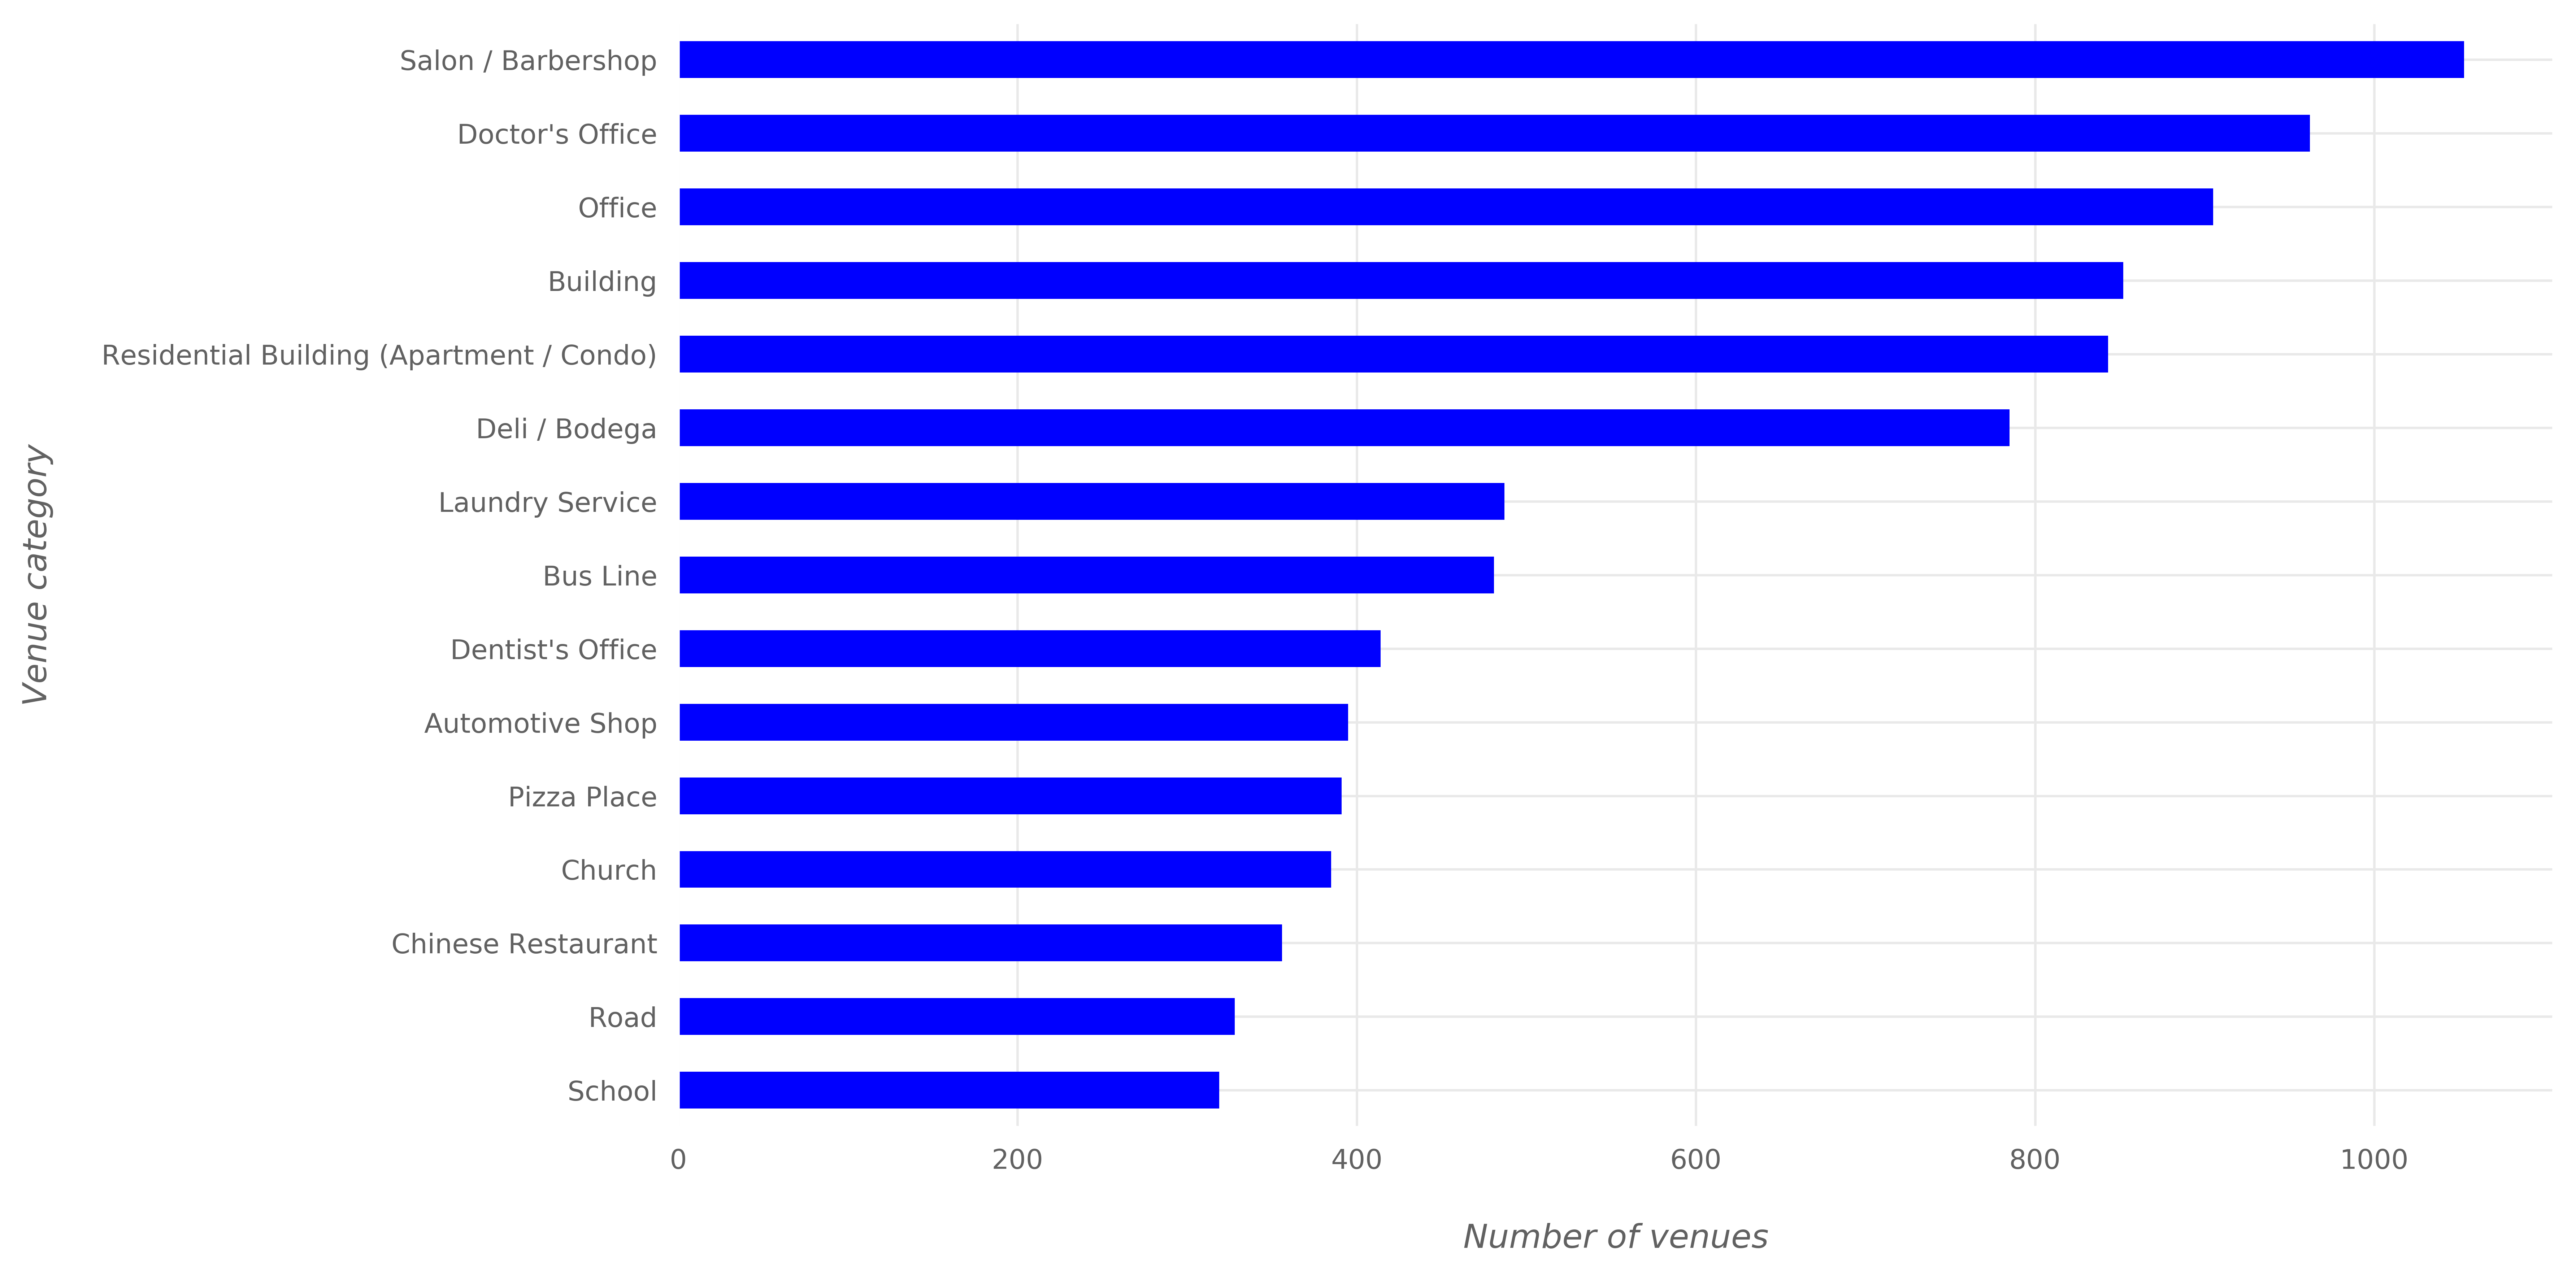

In [57]:
fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
nyc_top_vc = nyc_venues['Venue Category'].value_counts(normalize=False)
ax = nyc_top_vc.head(15).plot(kind='barh', color='blue');
ax.invert_yaxis()
plot_conf(ax, xlbl='Number of venues', ylbl='Venue category', t='')
plt.tight_layout()
fig.savefig('most-common-ven-nyc.png', dpi=300)

<b>Most Common Venue Categories in Toronto</b>

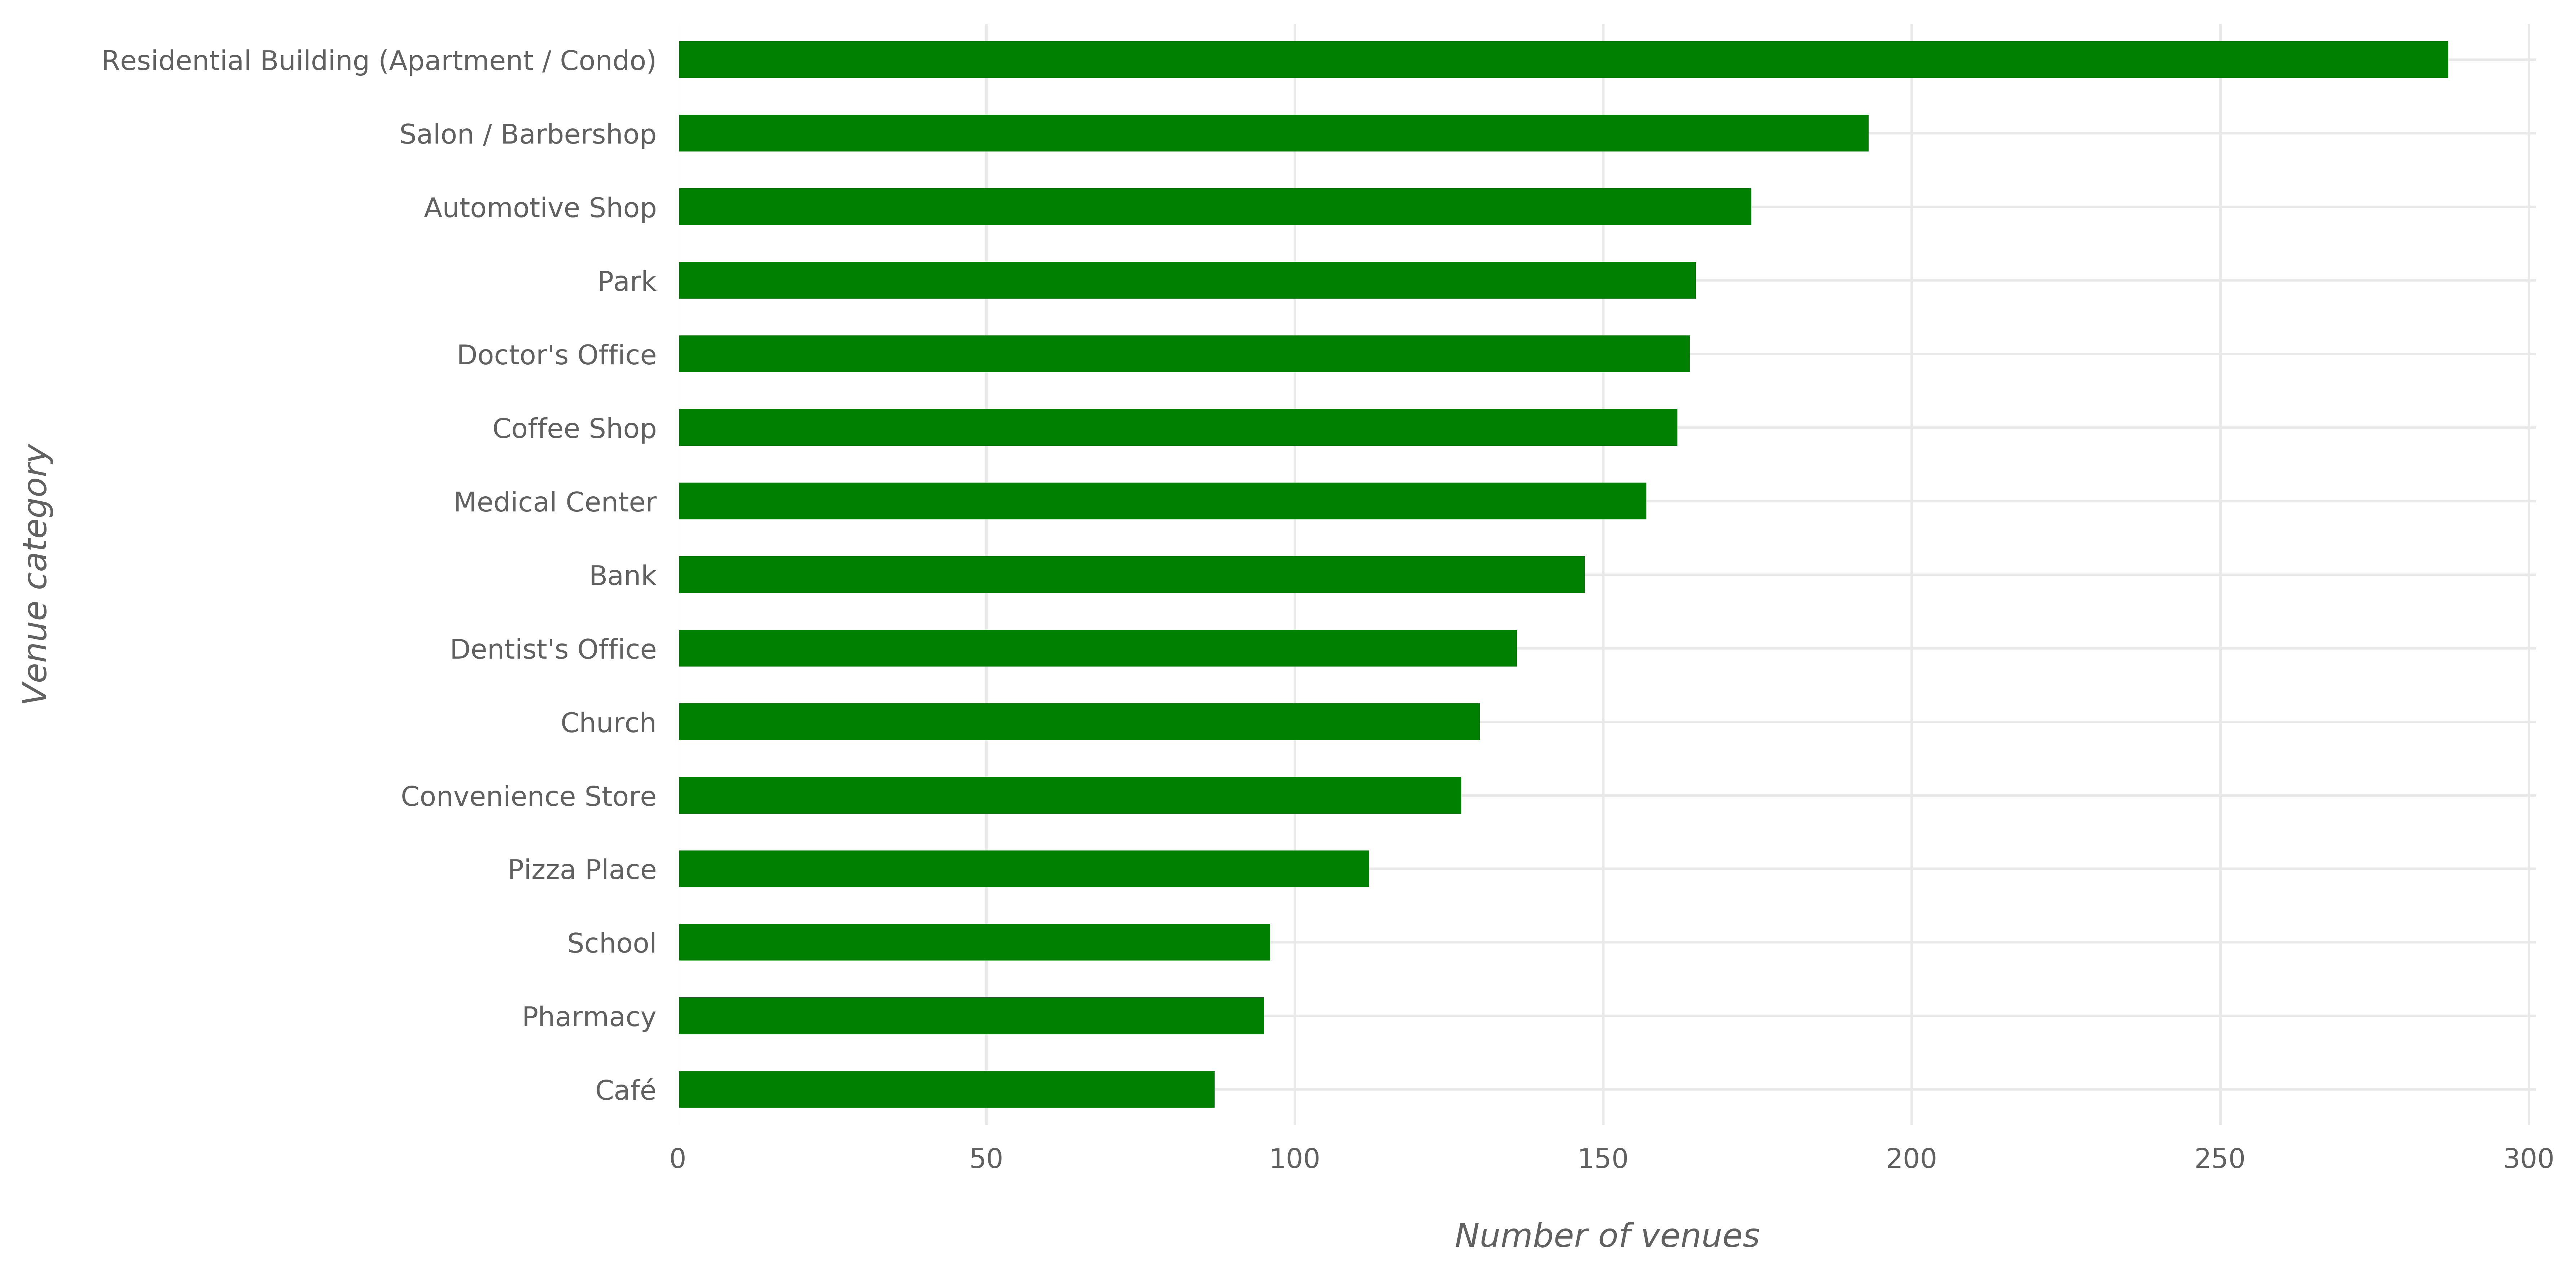

In [58]:
fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
tor_top_vc = tor_venues['Venue Category'].value_counts(normalize=False)
ax = tor_top_vc.head(15).plot(kind='barh', color='green');
ax.invert_yaxis()
plot_conf(ax, xlbl='Number of venues', ylbl='Venue category', t='')
plt.tight_layout()
fig.savefig('most-common-ven-tor.png', dpi=300)

<b>Which Venue Categories Exist in More NYC Neighborhoods?</b>

302 neighborhoods in NYC


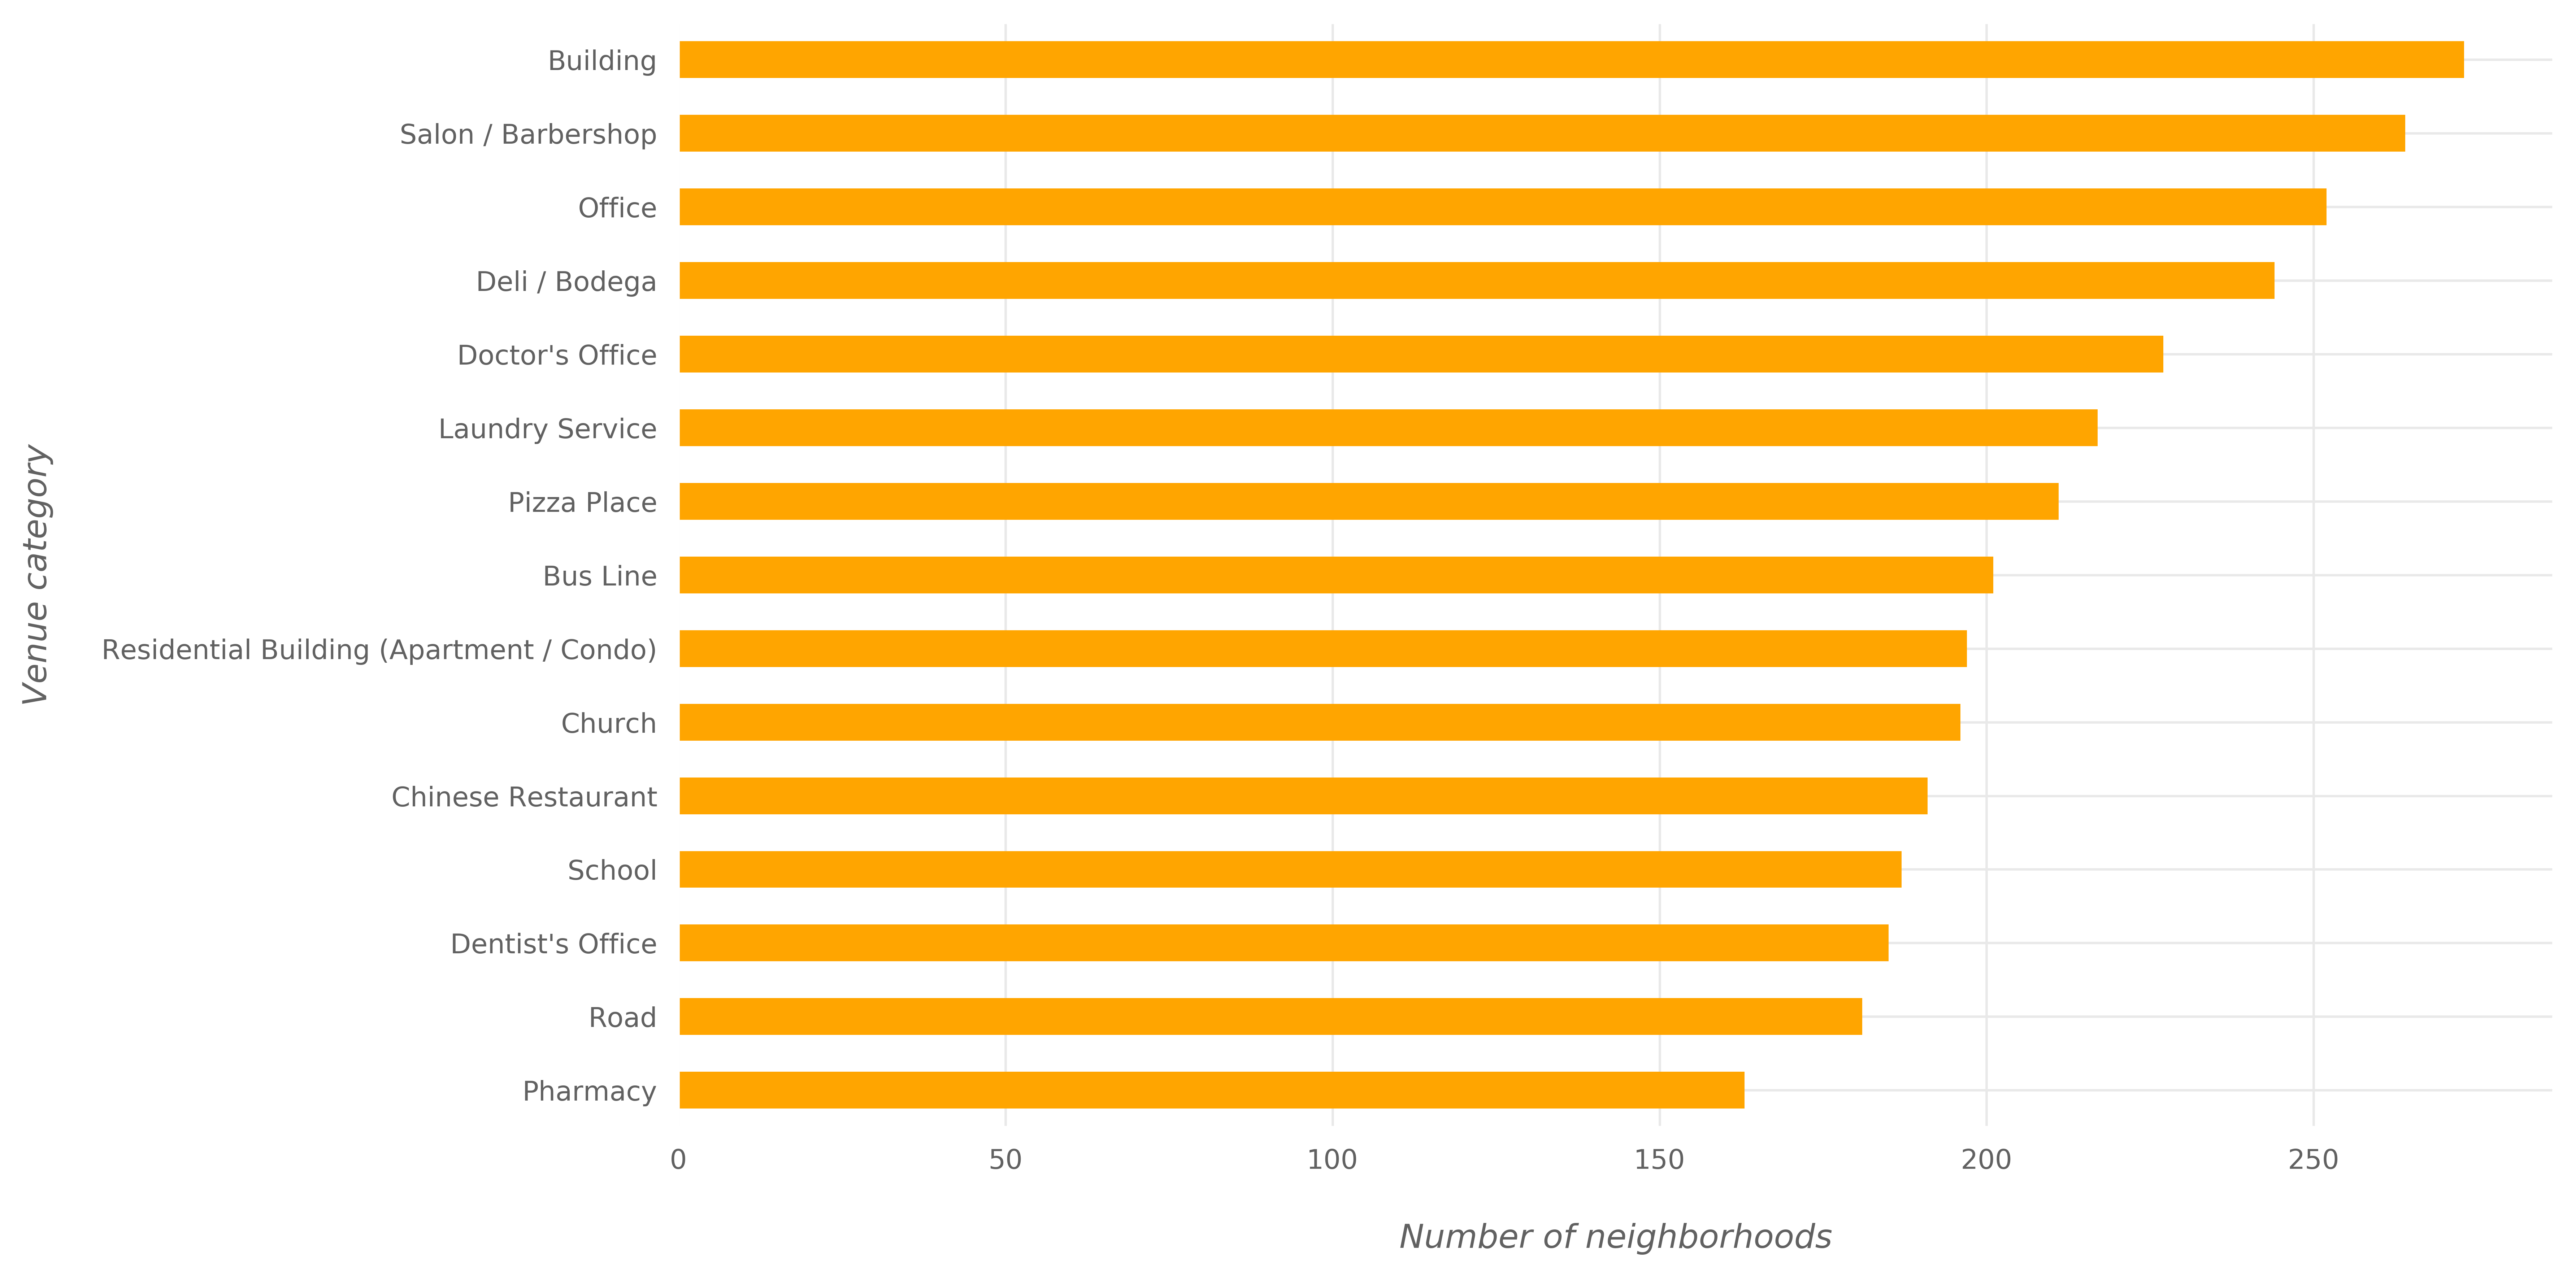

In [60]:
fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
nyc_g = nyc_onehot.groupby('Neighborhood_').max().reset_index()
nyc_p = nyc_g.drop('Neighborhood_', axis=1).sum().sort_values(ascending=False)
print("{} neighborhoods in NYC".format(nyc_g.shape[0]))
ax = nyc_p.head(15).plot(kind='barh', color='orange');
ax.invert_yaxis()
plot_conf(ax, xlbl='Number of neighborhoods', ylbl='Venue category', t='')
plt.tight_layout()
fig.savefig('most-common2-ven-nyc.png', dpi=300)

<b>Which Venue Categories Exist in More Toronto Neighborhoods?</b>

103 neighborhoods in Toronto


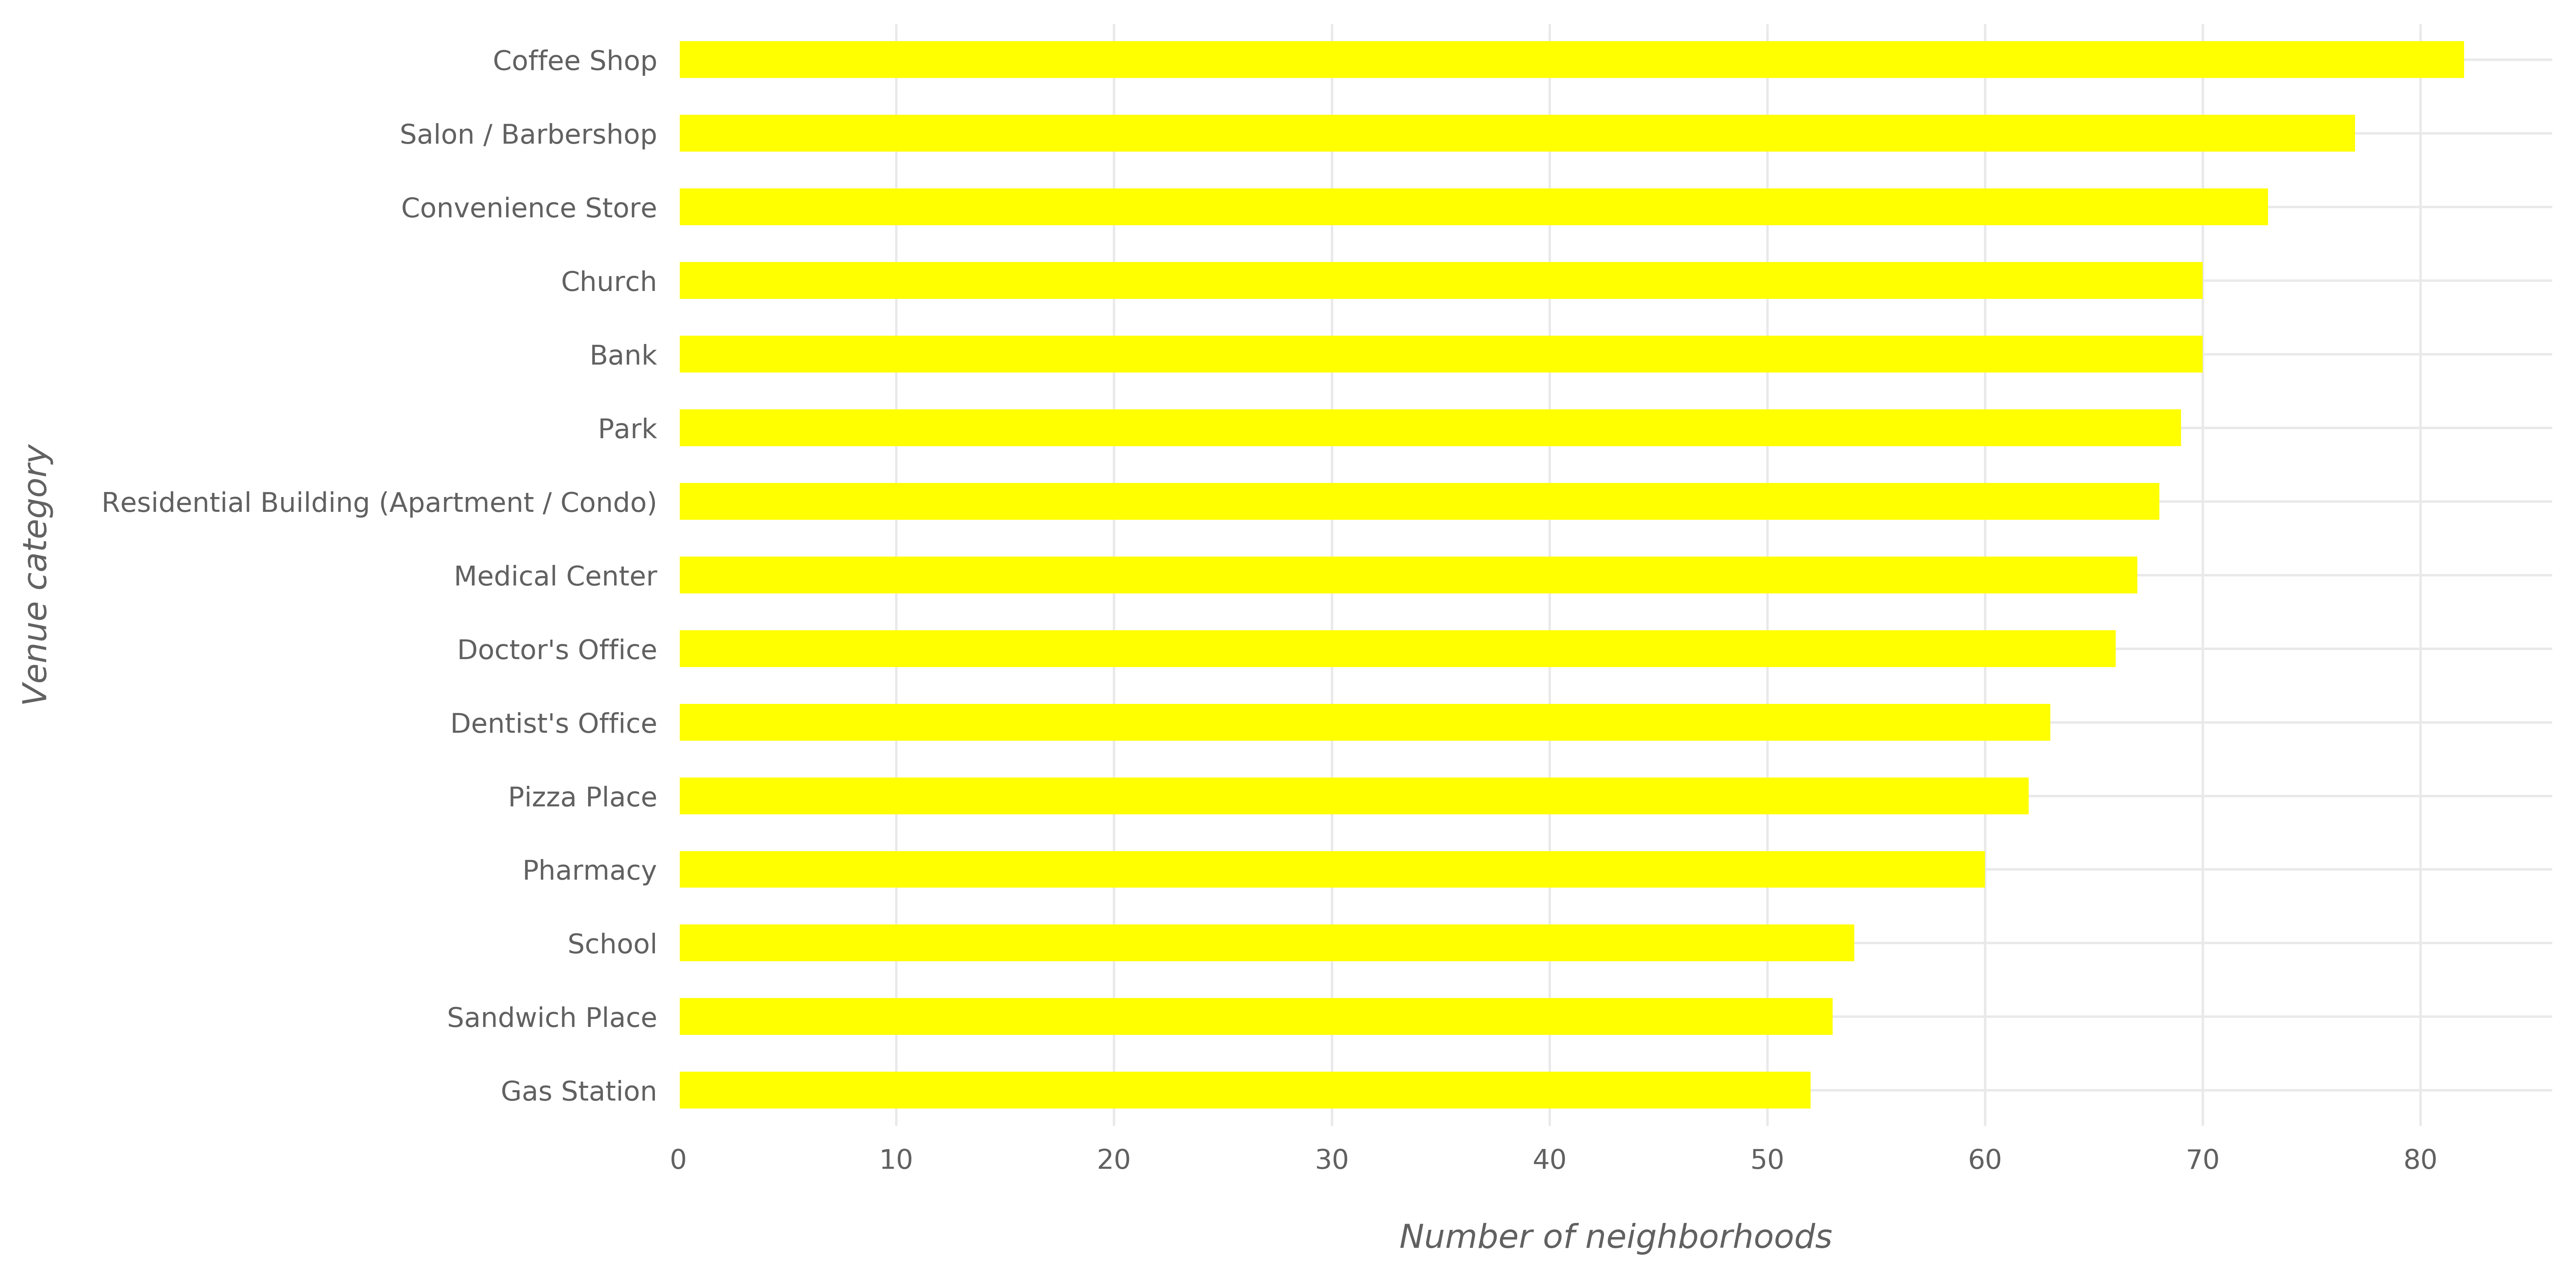

In [61]:
fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
tor_g = tor_onehot.groupby('Neighborhood_').max().reset_index()
tor_p = tor_g.drop('Neighborhood_', axis=1).sum().sort_values(ascending=False)
print("{} neighborhoods in Toronto".format(tor_g.shape[0]))
ax = tor_p.head(15).plot(kind='barh', color='yellow');
ax.invert_yaxis()
plot_conf(ax, xlbl='Number of neighborhoods', ylbl='Venue category', t='')
plt.tight_layout()
fig.savefig('most-common2-ven-tor.png', dpi=300)

<b>Rare Categories in NYC</b>

In [62]:
nyc_bot_vc = nyc_venues['Venue Category'].value_counts(normalize=False)
nyc_bot_vc = nyc_bot_vc.tail(15).to_frame('Count')
nyc_bot_vc.index.names = ['Venue Category']
nyc_bot_vc

Count
Venue Category             
Toll Booth                1
Leather Goods Store       1
Sausage Shop              1
Camera Store              1
Gun Range                 1
Comic Shop                1
Light Rail Station        1
Law School                1
Moroccan Restaurant       1
Baggage Claim             1
Caucasian Restaurant      1
Forest                    1
Recruiting Agency         1
Kebab Restaurant          1
Colombian Restaurant      1

<b>Rare Categories in Toronto</b>

In [63]:
tor_bot_vc = tor_venues['Venue Category'].value_counts(normalize=False)
tor_bot_vc = tor_bot_vc.tail(15).to_frame('Count')
tor_bot_vc.index.names = ['Venue Category']
tor_bot_vc

Count
Venue Category              
Moroccan Restaurant        1
Tapas Restaurant           1
Creperie                   1
Kingdom Hall               1
River                      1
Adult Boutique             1
Tree                       1
Entertainment Service      1
Ethiopian Restaurant       1
Airport Food Court         1
Sports Club                1
Sake Bar                   1
Locksmith                  1
Museum                     1
Track                      1

In [64]:
clmns_nyc_only = set(nyc_grouped.columns).difference(set(tor_grouped.columns))
clmns_tor_only = set(tor_grouped.columns).difference(set(nyc_grouped.columns))

In [65]:
nyc_grouped_ = nyc_grouped.copy()
nyc_grouped_['Neighborhood_'] = nyc_grouped_['Neighborhood_'].apply(lambda x: x + '_NYC')
tor_grouped_ = tor_grouped.copy()
tor_grouped_['Neighborhood_'] = tor_grouped_['Neighborhood_'].apply(lambda x: x + '_Toronto')

for c in clmns_tor_only:
    nyc_grouped_[c] = 0
for c in clmns_nyc_only:
    tor_grouped_[c] = 0
    
all_clmns_sorted = ['Neighborhood_'] + sorted(list(nyc_grouped_.drop('Neighborhood_', axis=1).columns), key=str.lower)
nyc_grouped_ = nyc_grouped_[all_clmns_sorted]
tor_grouped_ = tor_grouped_[all_clmns_sorted]
    
nyc_tor_grouped = pd.concat([nyc_grouped_, tor_grouped_]).reset_index(drop=True)

In [66]:
nyc_tor_grouped.loc[303:308,]

Neighborhood_  Accessories Store  \
303                                  Agincourt_Toronto                0.0   
304  Agincourt North, L'Amoreaux East, Milliken, St...                0.0   
305  Albion Gardens, Beaumond Heights, Humbergate, ...                0.0   
306                     Alderwood, Long Branch_Toronto                0.0   
307  Bathurst Manor, Downsview North, Wilson Height...                0.0   
308                            Bayview Village_Toronto                0.0   

     Acupuncturist  Adult Boutique  Advertising Agency  Afghan Restaurant  \
303       0.000000             0.0                 0.0                0.0   
304       0.000000             0.0                 0.0                0.0   
305       0.000000             0.0                 0.0                0.0   
306       0.000000             0.0                 0.0                0.0   
307       0.000000             0.0                 0.0                0.0   
308       0.012658             0.0                 0.0                0.0   

     African Restaurant  Airport  Airport Food Court  Airport Gate  \
303                 0.0      0.0                 0.0           0.0   
304                 0.0      0.0                 0.0           0.0   
305                 0.0      0.0                 0.0           0.0   
306                 0.0      0.0                 0.0           0.0   
307                 0.0      0.0                 0.0           0.0   
308                 0.0      0.0                 0.0           0.0   

     Airport Lounge  Airport Service  Airport Terminal  Airport Tram  \
303             0.0              0.0               0.0           0.0   
304             0.0              0.0               0.0           0.0   
305             0.0              0.0               0.0           0.0   
306             0.0              0.0               0.0           0.0   
307             0.0              0.0               0.0           0.0   
308             0.0              0.0               0.0           0.0   

     Alternative Healer  American Restaurant  Animal Shelter  Antique Shop  \
303                 0.0                  0.0             0.0           0.0   
304                 0.0                  0.0             0.0           0.0   
305                 0.0                  0.0             0.0           0.0   
306                 0.0                  0.0             0.0           0.0   
307                 0.0                  0.0             0.0           0.0   
308                 0.0                  0.0             0.0           0.0   

       Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  \
303  0.013333               0.0                     0.0     0.000000   
304  0.000000               0.0                     0.0     0.000000   
305  0.000000               0.0                     0.0     0.031579   
306  0.000000               0.0                     0.0     0.000000   
307  0.000000               0.0                     0.0     0.000000   
308  0.000000               0.0                     0.0     0.000000   

     Art Museum  Art Studio  Arts & Crafts Store  Arts & Entertainment  \
303         0.0    0.000000             0.000000                   0.0   
304         0.0    0.000000             0.017241                   0.0   
305         0.0    0.000000             0.000000                   0.0   
306         0.0    0.012346             0.012346                   0.0   
307         0.0    0.000000             0.000000                   0.0   
308         0.0    0.000000             0.000000                   0.0   

     Asian Restaurant  Assisted Living  Astrologer  Athletics & Sports  ATM  \
303          0.000000              0.0         0.0            0.000000  0.0   
304          0.034483              0.0         0.0            0.000000  0.0   
305          0.000000              0.0         0.0            0.000000  0.0   
306          0.024691              0.0         0.0            0.012346  0.0   

In [67]:
nyc_tor_grouped.shape

(405, 628)

In [68]:
# obtaining the most popular categories for each neighborhood
nyc_tor_neighborhoods_categories_sorted = pd.DataFrame(columns=columns)
nyc_tor_neighborhoods_categories_sorted['Neighborhood_'] = nyc_tor_grouped['Neighborhood_']

for ind in np.arange(nyc_tor_grouped.shape[0]):
    nyc_tor_neighborhoods_categories_sorted.iloc[ind, 1:] = return_most_common_venues(
        nyc_tor_grouped.iloc[ind, :], num_top_cat)

nyc_tor_neighborhoods_categories_sorted.head()

Neighborhood_ 1st Most Common Category     2nd Most Common Category  \
0       Allerton_NYC       Salon / Barbershop              Laundry Service   
1       Annadale_NYC       Salon / Barbershop                  Pizza Place   
2  Arden Heights_NYC                     Road  Professional & Other Places   
3      Arlington_NYC          Automotive Shop               Hardware Store   
4       Arrochar_NYC                 Bus Stop                       Office   

  3rd Most Common Category     4th Most Common Category  \
0            Deli / Bodega             Dentist's Office   
1      American Restaurant                Tattoo Parlor   
2         Dentist's Office              Doctor's Office   
3                   Office  Professional & Other Places   
4            Deli / Bodega                     Bus Line   

  5th Most Common Category 6th Most Common Category 7th Most Common Category  
0               Non-Profit              Pizza Place                   Office  
1               Nail Salon                      Spa               Restaurant  
2            Moving Target       Salon / Barbershop                     Food  
3            Boat or Ferry       Salon / Barbershop                 Building  
4          Doctor's Office               Food Truck             Liquor Store

<b>Most Common Venue Categories in both NYC and Toronto</b>
<br>
<b>Rare Categories in both NYC and Toronto</b>

In [69]:
nyc_tor_bot_vc = pd.concat([nyc_venues, tor_venues])['Venue Category'].value_counts(normalize=False)
nyc_tor_bot_vc = nyc_tor_bot_vc.tail(15).to_frame('Count')
nyc_tor_bot_vc.index.names = ['Venue Category']
nyc_tor_bot_vc

Count
Venue Category                 
Stadium                       1
Lottery Retailer              1
Squash Court                  1
Hungarian Restaurant          1
Botanical Garden              1
Corporate Coffee Shop         1
Public Bathroom               1
Paintball Field               1
College Baseball Diamond      1
Cable Car                     1
Street Fair                   1
Toll Booth                    1
Tiki Bar                      1
Peking Duck Restaurant        1
Varenyky restaurant           1

<h3>Clustering</h3>

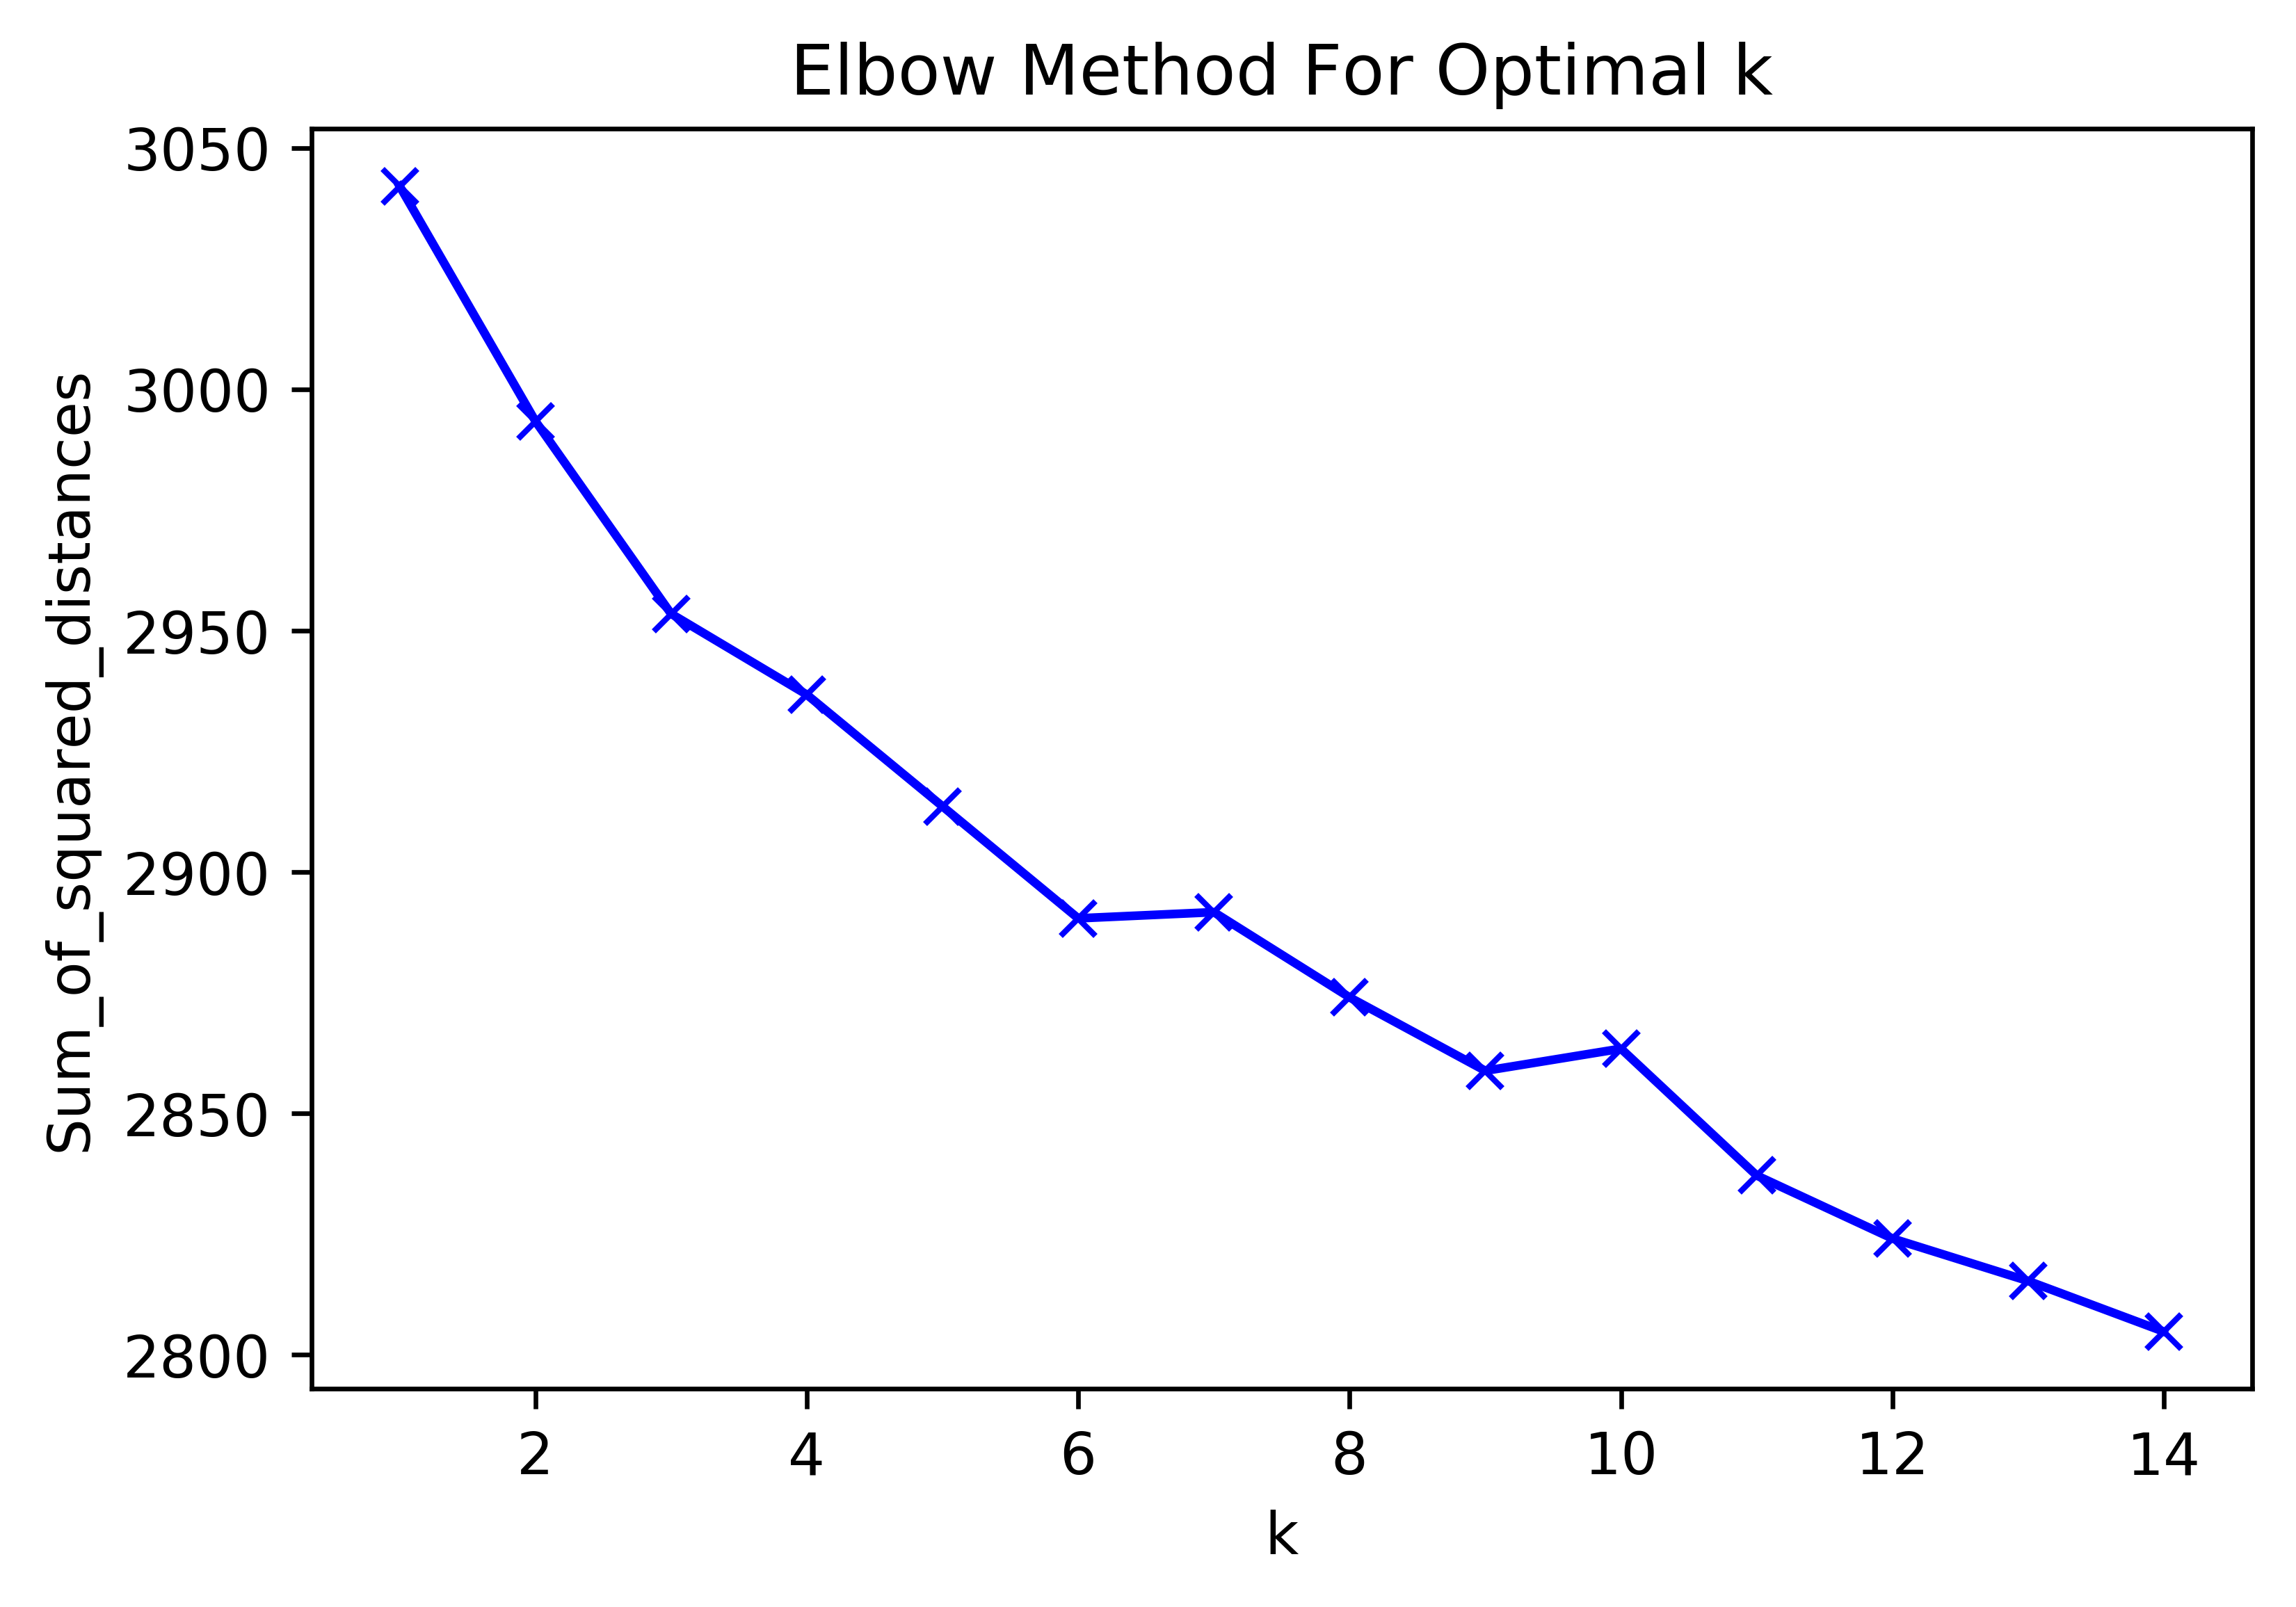

In [71]:
nyc_tor_grouped_clustering = nyc_tor_grouped.drop('Neighborhood_', 1)
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(nyc_tor_grouped_clustering )
data_transformed = mms.transform(nyc_tor_grouped_clustering )
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [72]:
# Since the elbow method shows the k is optimum at 6; setting the clusters at 6
kclusters = 6

#nyc_tor_grouped_clustering = nyc_tor_grouped.drop('Neighborhood_', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyc_tor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 3, 3, 3, 3, 4, 3, 3, 3], dtype=int32)

In [73]:
# add clustering labels
nyc_tor_neighborhoods_categories_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# nyc_tor_merged = nyc_tor_neighborhoods.rename(columns={'Neighborhood': 'Neighborhood_'}).copy()
# tor_merged = tor_merged[~tor_merged['Neighborhood_'].isin(tor_excluded_neighborhoods)]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nyc_tor_merged = nyc_tor_neighborhoods_categories_sorted.set_index('Neighborhood_')

nyc_tor_merged.iloc[300:310] # check the last columns!

Cluster Labels  \
Neighborhood_                                                        
Woodside_NYC                                                     0   
Yorkville_NYC                                                    4   
Adelaide, King, Richmond_Toronto                                 5   
Agincourt_Toronto                                                5   
Agincourt North, L'Amoreaux East, Milliken, Ste...               5   
Albion Gardens, Beaumond Heights, Humbergate, J...               0   
Alderwood, Long Branch_Toronto                                   5   
Bathurst Manor, Downsview North, Wilson Heights...               2   
Bayview Village_Toronto                                          5   
Bedford Park, Lawrence Manor East_Toronto                        5   

                                                                    1st Most Common Category  \
Neighborhood_                                                                                  
Woodside_NYC                                                              Salon / Barbershop   
Yorkville_NYC                                       Residential Building (Apartment / Condo)   
Adelaide, King, Richmond_Toronto                                                        Café   
Agincourt_Toronto                                                            Automotive Shop   
Agincourt North, L'Amoreaux East, Milliken, Ste...                        Chinese Restaurant   
Albion Gardens, Beaumond Heights, Humbergate, J...                        Salon / Barbershop   
Alderwood, Long Branch_Toronto                                              Dentist's Office   
Bathurst Manor, Downsview North, Wilson Heights...                           Doctor's Office   
Bayview Village_Toronto                                                               Church   
Bedford Park, Lawrence Manor East_Toronto                                 Salon / Barbershop   

                                                                    2nd Most Common Category  \
Neighborhood_                                                                                  
Woodside_NYC                                                                             Bar   
Yorkville_NYC                                                                Laundry Service   
Adelaide, King, Richmond_Toronto                                                 Coffee Shop   
Agincourt_Toronto                                                                Coffee Shop   
Agincourt North, L'Amoreaux East, Milliken, Ste...                                    School   
Albion Gardens, Beaumond Heights, Humbergate, J...                             Movie Theater   
Alderwood, Long Branch_Toronto                                                Medical Center   
Bathurst Manor, Downsview North, Wilson Heights...  Residential Building (Apartment / Condo)   
Bayview Village_Toronto                                                      Doctor's Office   
Bedford Park, Lawrence Manor East_Toronto                                 Italian Restaurant   

                                                                    3rd Most Common Category  \
Neighborhood_                                                                                  
Woodside_NYC                                                                        Platform   
Yorkville_NYC                                                                    Flower Shop   
Adelaide, King, Richmond_Toronto                                                  Food Court   
Agincourt_Toronto                                                            Doctor's Office   
Agincourt North, L'Amoreaux East, Milliken, Ste...                                 BBQ Joint   
Albion Gardens, Beaumond Heights, Humbergate, J...                          Spiritual Center   
Alderwood, Long Branch_Toronto                                            Salon / Barbershop   
Bathurst Manor, Downsview North, Wilson H

<b>Examining clusters</b><br>
Let's see the neighborhoods in each of the five clusters:<br>

<b>Cluster 1</b>

In [74]:
c1 = nyc_tor_merged.loc[nyc_tor_merged['Cluster Labels'] == 0, :]
print(c1.shape)
c1.iloc[60:70]

(80, 8)


Cluster Labels  \
Neighborhood_                            
Ridgewood_NYC                        0   
Rosedale_NYC                         0   
Rugby_NYC                            0   
Soundview_NYC                        0   
South Side_NYC                       0   
St. Albans_NYC                       0   
Stapleton_NYC                        0   
Tompkinsville_NYC                    0   
Unionport_NYC                        0   
University Heights_NYC               0   

                                        1st Most Common Category  \
Neighborhood_                                                      
Ridgewood_NYC                                      Deli / Bodega   
Rosedale_NYC                                  Salon / Barbershop   
Rugby_NYC                                     Salon / Barbershop   
Soundview_NYC           Residential Building (Apartment / Condo)   
South Side_NYC                                Salon / Barbershop   
St. Albans_NYC                                Salon / Barbershop   
Stapleton_NYC                                 Salon / Barbershop   
Tompkinsville_NYC                             Salon / Barbershop   
Unionport_NYC                                 Salon / Barbershop   
University Heights_NYC                 College Academic Building   

                                        2nd Most Common Category  \
Neighborhood_                                                      
Ridgewood_NYC                                    Doctor's Office   
Rosedale_NYC                                Caribbean Restaurant   
Rugby_NYC                                   Caribbean Restaurant   
Soundview_NYC                                           Bus Line   
South Side_NYC          Residential Building (Apartment / Condo)   
St. Albans_NYC                              Caribbean Restaurant   
Stapleton_NYC                                               Food   
Tompkinsville_NYC                             Mexican Restaurant   
Unionport_NYC                                    Laundry Service   
University Heights_NYC                             Deli / Bodega   

                       3rd Most Common Category 4th Most Common Category  \
Neighborhood_                                                              
Ridgewood_NYC                    Hardware Store                 Building   
Rosedale_NYC                     Cosmetics Shop          Laundry Service   
Rugby_NYC                         Deli / Bodega          Laundry Service   
Soundview_NYC               Housing Development            Deli / Bodega   
South Side_NYC                    Deli / Bodega        Indian Restaurant   
St. Albans_NYC                  Laundry Service            Deli / Bodega   
Stapleton_NYC                     Deli / Bodega                   Church   
Tompkinsville_NYC                   Pizza Place     Caribbean Restaurant   
Unionport_NYC                        Shoe Store                 Building   
University Heights_NYC       Salon / Barbershop          Doctor's Office   

                       5th Most Common Category     6th Most Common Category  \
Neighborhood_                                                                  
Ridgewood_NYC                          Bus Line           Salon / Barbershop   
Rosedale_NYC                Fried Chicken Joint                  Gas Station   
Rugby_NYC                    Chinese Restaurant            Elementary School   
Soundview_NYC                   Laundry Service           Salon / Barbershop   
South Side_NYC                           Office                     Tea Room   
St. Albans_NYC                         Bus Line  Professional & Other Places   
Stapleton_NYC                       Pizza Place                       Office   
Tompkinsville_NYC                        Church                Deli / Bodega   
Unionport_NYC                     Deli / Bodega                         Bank   
University Heights_NYC              Supermarket                Moving Target   

           

Most common categories among all neighborhoods in this cluster:
<br>
<b>Cluster 2</b>

In [75]:
c2 = nyc_tor_merged.loc[nyc_tor_merged['Cluster Labels'] == 1, :]
print(c2.shape)
c2

(13, 8)


Cluster Labels 1st Most Common Category  \
Neighborhood_                                                     
Blissville_NYC                       1                   Office   
Bloomfield_NYC                       1                   Office   
Civic Center_NYC                     1                   Office   
Dumbo_NYC                            1                   Office   
Financial District_NYC               1                   Office   
Flatiron_NYC                         1                   Office   
Gowanus_NYC                          1                   Office   
Little Italy_NYC                     1       Italian Restaurant   
Midtown_NYC                          1                   Office   
Midtown South_NYC                    1                   Office   
Soho_NYC                             1                   Office   
Turtle Bay_NYC                       1      Government Building   
Vinegar Hill_NYC                     1                   Office   

                            2nd Most Common Category 3rd Most Common Category  \
Neighborhood_                                                                   
Blissville_NYC                           Gas Station                     Road   
Bloomfield_NYC                       Doctor's Office          Automotive Shop   
Civic Center_NYC                              Lawyer          Doctor's Office   
Dumbo_NYC                               Tech Startup              Art Gallery   
Financial District_NYC                      Building                      Bar   
Flatiron_NYC                            Tech Startup                 Building   
Gowanus_NYC                                 Building            Design Studio   
Little Italy_NYC                              Office       Salon / Barbershop   
Midtown_NYC             General College & University                 Building   
Midtown South_NYC                American Restaurant                      Spa   
Soho_NYC                              Clothing Store                 Boutique   
Turtle Bay_NYC                                Office      Embassy / Consulate   
Vinegar Hill_NYC                        Tech Startup                 Building   

                                        4th Most Common Category  \
Neighborhood_                                                      
Blissville_NYC                                   Automotive Shop   
Bloomfield_NYC                               Sporting Goods Shop   
Civic Center_NYC                                    Tech Startup   
Dumbo_NYC                                        Coworking Space   
Financial District_NYC                                Food Truck   
Flatiron_NYC                                Gym / Fitness Center   
Gowanus_NYC                                      Coworking Space   
Little Italy_NYC                                        Building   
Midtown_NYC                                         Tech Startup   
Midtown South_NYC                                  Jewelry Store   
Soho_NYC                                           Jewelry Store   
Turtle Bay_NYC          Residential Building (Apartment / Condo)   
Vinegar Hill_NYC                                     Art Gallery   

                       5th Most Common Category  \
Neighborhood_                                     
Blissville_NYC                    Deli / Bodega   
Bloomfield_NYC                             Road   
Civic Center_NYC            Government Building   
Dumbo_NYC                            Food Stand   
Financial District_NYC                      Gym   
Flatiron_NYC                           Boutique   
Gowanus_NYC                         Art Gallery   
Little Italy_NYC                   Tech Startup   
Midtown_NYC                 American Restaurant   
Midtown South_NYC                         Hotel   
Soho_NYC                          Women's Store   
Turtle Bay_NYC                         Building   
Vinegar Hill_NYC                    Event Space   

               

<b>Cluster 3</b>

In [76]:
c3 = nyc_tor_merged.loc[nyc_tor_merged['Cluster Labels'] == 2, :]
print(c3.shape)
c3

(52, 8)


Cluster Labels  \
Neighborhood_                                                        
Bay Terrace_NYC                                                  2   
Bayside_NYC                                                      2   
Bergen Beach_NYC                                                 2   
Brooklyn Heights_NYC                                             2   
Bulls Head_NYC                                                   2   
Castleton Corners_NYC                                            2   
Charleston_NYC                                                   2   
Concord_NYC                                                      2   
Dongan Hills_NYC                                                 2   
Dyker Heights_NYC                                                2   
Egbertville_NYC                                                  2   
Eltingville_NYC                                                  2   
Emerson Hill_NYC                                                 2   
Forest Hills_NYC                                                 2   
Fort Hamilton_NYC                                                2   
Georgetown_NYC                                                   2   
Glendale_NYC                                                     2   
Gramercy_NYC                                                     2   
Greenpoint_NYC                                                   2   
Greenridge_NYC                                                   2   
Heartland Village_NYC                                            2   
Holliswood_NYC                                                   2   
Kew Gardens_NYC                                                  2   
Lindenwood_NYC                                                   2   
Madison_NYC                                                      2   
Manhattan Terrace_NYC                                            2   
Midwood_NYC                                                      2   
Morris Park_NYC                                                  2   
Murray Hill_NYC                                                  2   
New Dorp_NYC                                                     2   
New Springville_NYC                                              2   
Norwood_NYC                                                      2   
Oakwood_NYC                                                      2   
Ocean Parkway_NYC                                                2   
Park Hill_NYC                                                    2   
Pelham Gardens_NYC                                               2   
Pelham Parkway_NYC                                               2   
Pomonok_NYC                                                      2   
Queensboro Hill_NYC                                              2   
Rego Park_NYC                                                    2   
Rockaway Park_NYC                                                2   
Schuylerville_NYC                                                2   
South Beach_NYC                                                  2   
Starrett City_NYC                                                2   
Todt Hill_NYC                                                    2   
Tudor City_NYC                                                   2   
Upper East Side_NYC                                              2   
West Brighton_NYC                                                2   
Bathurst Manor, Downsview North, Wilson Heights...               2   
Deer Park, Forest Hill SE, Rathnelly, South Hil...               2   
L'Amoreaux West_Toronto                                          2   
Roselawn_Toronto                                                 2   

                                                                    1st Most Common Category  \
Neighborhood_                                                                                  
Bay Terrace_NYC                                     Residential Building (Apart

<b>Cluster 4</b>

In [77]:
c4 = nyc_tor_merged.loc[nyc_tor_merged['Cluster Labels'] == 3, :]
print(c4.shape)
c4

(119, 8)


Cluster Labels  \
Neighborhood_                                                        
Arden Heights_NYC                                                3   
Arlington_NYC                                                    3   
Arrochar_NYC                                                     3   
Arverne_NYC                                                      3   
Astoria Heights_NYC                                              3   
Auburndale_NYC                                                   3   
Bath Beach_NYC                                                   3   
Baychester_NYC                                                   3   
Bayswater_NYC                                                    3   
Bellaire_NYC                                                     3   
Belle Harbor_NYC                                                 3   
Bellerose_NYC                                                    3   
Borough Park_NYC                                                 3   
Breezy Point_NYC                                                 3   
Broad Channel_NYC                                                3   
Broadway Junction_NYC                                            3   
Brookville_NYC                                                   3   
Brownsville_NYC                                                  3   
Bushwick_NYC                                                     3   
Butler Manor_NYC                                                 3   
Carroll Gardens_NYC                                              3   
Castle Hill_NYC                                                  3   
Chelsea_NYC                                                      3   
Chinatown_NYC                                                    3   
City Island_NYC                                                  3   
Clason Point_NYC                                                 3   
Clifton_NYC                                                      3   
Clinton_NYC                                                      3   
Co-op City_NYC                                                   3   
Cobble Hill_NYC                                                  3   
College Point_NYC                                                3   
Coney Island_NYC                                                 3   
Country Club_NYC                                                 3   
Eastchester_NYC                                                  3   
Edgemere_NYC                                                     3   
Edgewater Park_NYC                                               3   
Elm Park_NYC                                                     3   
Flushing_NYC                                                     3   
Fox Hills_NYC                                                    3   
Fulton Ferry_NYC                                                 3   
Gerritsen Beach_NYC                                              3   
Graniteville_NYC                                                 3   
Grant City_NYC                                                   3   
Grasmere_NYC                                                     3   
Gravesend_NYC                                                    3   
Grymes Hill_NYC                                                  3   
Hammels_NYC                                                      3   
Howland Hook_NYC                                                 3   
Hudson Yards_NYC                                                 3   
Huguenot_NYC                                                     3   
Hunts Point_NYC                                                  3   
Jamaica Center_NYC                                               3   
Jamaica Estates_NYC                                              3   
Kensington_NYC                                                   3   
Kew Gardens Hills_NYC                                            3   
Lighthouse Hill_NYC                                           

<b>Cluster 5</b>

In [78]:
c5 = nyc_tor_merged.loc[nyc_tor_merged['Cluster Labels'] == 4, :]
print(c5.shape)
c5

(43, 8)


Cluster Labels  \
Neighborhood_                                                        
Astoria_NYC                                                      4   
Battery Park City_NYC                                            4   
Bedford Park_NYC                                                 4   
Briarwood_NYC                                                    4   
Bronxdale_NYC                                                    4   
Ditmas Park_NYC                                                  4   
East Williamsburg_NYC                                            4   
Elmhurst_NYC                                                     4   
Flatbush_NYC                                                     4   
Forest Hills Gardens_NYC                                         4   
Fort Greene_NYC                                                  4   
Fresh Meadows_NYC                                                4   
Hamilton Heights_NYC                                             4   
Jackson Heights_NYC                                              4   
Lefrak City_NYC                                                  4   
Lower East Side_NYC                                              4   
Melrose_NYC                                                      4   
Morris Heights_NYC                                               4   
Mott Haven_NYC                                                   4   
Prospect Park South_NYC                                          4   
Ravenswood_NYC                                                   4   
Riverdale_NYC                                                    4   
Rochdale_NYC                                                     4   
Roosevelt Island_NYC                                             4   
Spuyten Duyvil_NYC                                               4   
Stuyvesant Town_NYC                                              4   
Sunnyside Gardens_NYC                                            4   
Upper West Side_NYC                                              4   
Washington Heights_NYC                                           4   
West Village_NYC                                                 4   
Yorkville_NYC                                                    4   
Brockton, Exhibition Place, Parkdale Village_To...               4   
Church and Wellesley_Toronto                                     4   
Davisville North_Toronto                                         4   
Downsview West_Toronto                                           4   
Harbourfront East, Toronto Islands, Union Stati...               4   
Humber Bay, King's Mill Park, Kingsway Park Sou...               4   
Parkwoods_Toronto                                                4   
Rosedale_Toronto                                                 4   
Silver Hills, York Mills_Toronto                                 4   
The Annex, North Midtown, Yorkville_Toronto                      4   
Willowdale West_Toronto                                          4   
York Mills West_Toronto                                          4   

                                                                    1st Most Common Category  \
Neighborhood_                                                                                  
Astoria_NYC                                         Residential Building (Apartment / Condo)   
Battery Park City_NYC                               Residential Building (Apartment / Condo)   
Bedford Park_NYC                                    Residential Building (Apartment / Condo)   
Briarwood_NYC                                       Residential Building (Apartment / Condo)   
Bronxdale_NYC                                       Residential Building (Apartment / Condo)   
Ditmas Park_NYC                                     Residential Building (Apartment / Condo)   
East Williamsburg_NYC                               Residential Building (Apartment / Condo)   
Elmhurst_NYC                         

In [79]:
c6 = nyc_tor_merged.loc[nyc_tor_merged['Cluster Labels'] == 4, :]
print(c6.shape)
c6

(43, 8)


Cluster Labels  \
Neighborhood_                                                        
Astoria_NYC                                                      4   
Battery Park City_NYC                                            4   
Bedford Park_NYC                                                 4   
Briarwood_NYC                                                    4   
Bronxdale_NYC                                                    4   
Ditmas Park_NYC                                                  4   
East Williamsburg_NYC                                            4   
Elmhurst_NYC                                                     4   
Flatbush_NYC                                                     4   
Forest Hills Gardens_NYC                                         4   
Fort Greene_NYC                                                  4   
Fresh Meadows_NYC                                                4   
Hamilton Heights_NYC                                             4   
Jackson Heights_NYC                                              4   
Lefrak City_NYC                                                  4   
Lower East Side_NYC                                              4   
Melrose_NYC                                                      4   
Morris Heights_NYC                                               4   
Mott Haven_NYC                                                   4   
Prospect Park South_NYC                                          4   
Ravenswood_NYC                                                   4   
Riverdale_NYC                                                    4   
Rochdale_NYC                                                     4   
Roosevelt Island_NYC                                             4   
Spuyten Duyvil_NYC                                               4   
Stuyvesant Town_NYC                                              4   
Sunnyside Gardens_NYC                                            4   
Upper West Side_NYC                                              4   
Washington Heights_NYC                                           4   
West Village_NYC                                                 4   
Yorkville_NYC                                                    4   
Brockton, Exhibition Place, Parkdale Village_To...               4   
Church and Wellesley_Toronto                                     4   
Davisville North_Toronto                                         4   
Downsview West_Toronto                                           4   
Harbourfront East, Toronto Islands, Union Stati...               4   
Humber Bay, King's Mill Park, Kingsway Park Sou...               4   
Parkwoods_Toronto                                                4   
Rosedale_Toronto                                                 4   
Silver Hills, York Mills_Toronto                                 4   
The Annex, North Midtown, Yorkville_Toronto                      4   
Willowdale West_Toronto                                          4   
York Mills West_Toronto                                          4   

                                                                    1st Most Common Category  \
Neighborhood_                                                                                  
Astoria_NYC                                         Residential Building (Apartment / Condo)   
Battery Park City_NYC                               Residential Building (Apartment / Condo)   
Bedford Park_NYC                                    Residential Building (Apartment / Condo)   
Briarwood_NYC                                       Residential Building (Apartment / Condo)   
Bronxdale_NYC                                       Residential Building (Apartment / Condo)   
Ditmas Park_NYC                                     Residential Building (Apartment / Condo)   
East Williamsburg_NYC                               Residential Building (Apartment / Condo)   
Elmhurst_NYC                         

In [80]:
clust_cats = []
clusters = [c1, c2, c3, c4, c5,c6]
for i, clus in enumerate(clusters):
    clust_cats.append([])
    for n in clus.index.values:
        if n.endswith('NYC'):
            nn = n[:-4]
            clust_cats[i].extend(list(nyc_venues[nyc_venues['Neighborhood'] == nn]['Venue Category'].values))
        else:
            nn = n[:-8]
            clust_cats[i].extend(list(tor_venues[tor_venues['Neighborhood'] == nn]['Venue Category'].values))
    clust_cats[i] = pd.Series(clust_cats[i]).value_counts(normalize=True) * 100

In [81]:
tbl_bck = "#363636"
tbl_hdr_bck = "#363636"
tbl_txt = "#BBBBBB"

styles = [
    dict(selector="td", props=[("border", "0px solid #333"), ("padding", "8px 20px 8px 20px"), 
                               ("background", tbl_bck), ("text-align", "left"),
                               ("color", tbl_txt), ("font-size", "10pt")]),
    
    dict(selector="th", props=[("border", "0px solid #333"), ("padding", "8px 20px 8px 20px"), 
                               ("background", tbl_bck), ("text-align", "left"),
                               ("color", tbl_txt), ("font-size", "10pt")]),
    
    dict(selector=".col0", props=[("border-left", "1px solid #bbbbbb")]), 
    
    dict(selector="th.blank:nth-child(2)", props=[("border-left", "1px solid #bbbbbb")]),
    
    dict(selector="thead tr:nth-child(2) th", props=[("padding-top", "0"), ("padding-bottom", "8px")]),
    
    dict(selector="th.col_heading", props=[("background", tbl_hdr_bck), 
                                           ("color", "#FFCA91")]),
    
    dict(selector="th.index_name", props=[("background", tbl_hdr_bck), 
                                          ("color", "#8DCDFF")]),
    
    dict(selector="th.blank", props=[("background", tbl_hdr_bck), ("padding", "0")]),
    
    dict(selector="tr:nth-child(2n)", props=[("background", "white")]),
    
    dict(selector="thead tr:nth-child(2) th", props=[("border-bottom", "1px solid {}".format(tbl_txt))]),
    
    dict(selector="thead tr:nth-child(1) th", props=[("padding-top", "14px !important")]),
    
    dict(selector="tbody tr:last-child td", props=[("padding-bottom", "20px")]),
    
    dict(selector="tbody tr:last-child th", props=[("padding-bottom", "20px")]),
    
    dict(selector="td:hover", props=[("font-weight", "bold"), ("background", "#002b36"), ("color", "#8DCDFF")]),
]

In [82]:
for i in range(kclusters):
    c__ = clust_cats[i].to_frame("% of venues")
    c__.index.names = ['Category']
    html = (c__.head(7).style.set_table_styles(styles)
            .set_table_attributes('style="border-collapse: collapse; border: 2px solid #BBBBBB"'))
    display(HTML("Cluster {}".format(i+1)))
    display(html)

In [83]:
n_counts = []
for c in clusters:
    nyc_c = 0
    tor_c = 0
    for n in c.index.values:
        if n.endswith('NYC'):
            nyc_c += 1
        else:
            tor_c += 1
    n_counts.append((nyc_c, tor_c))

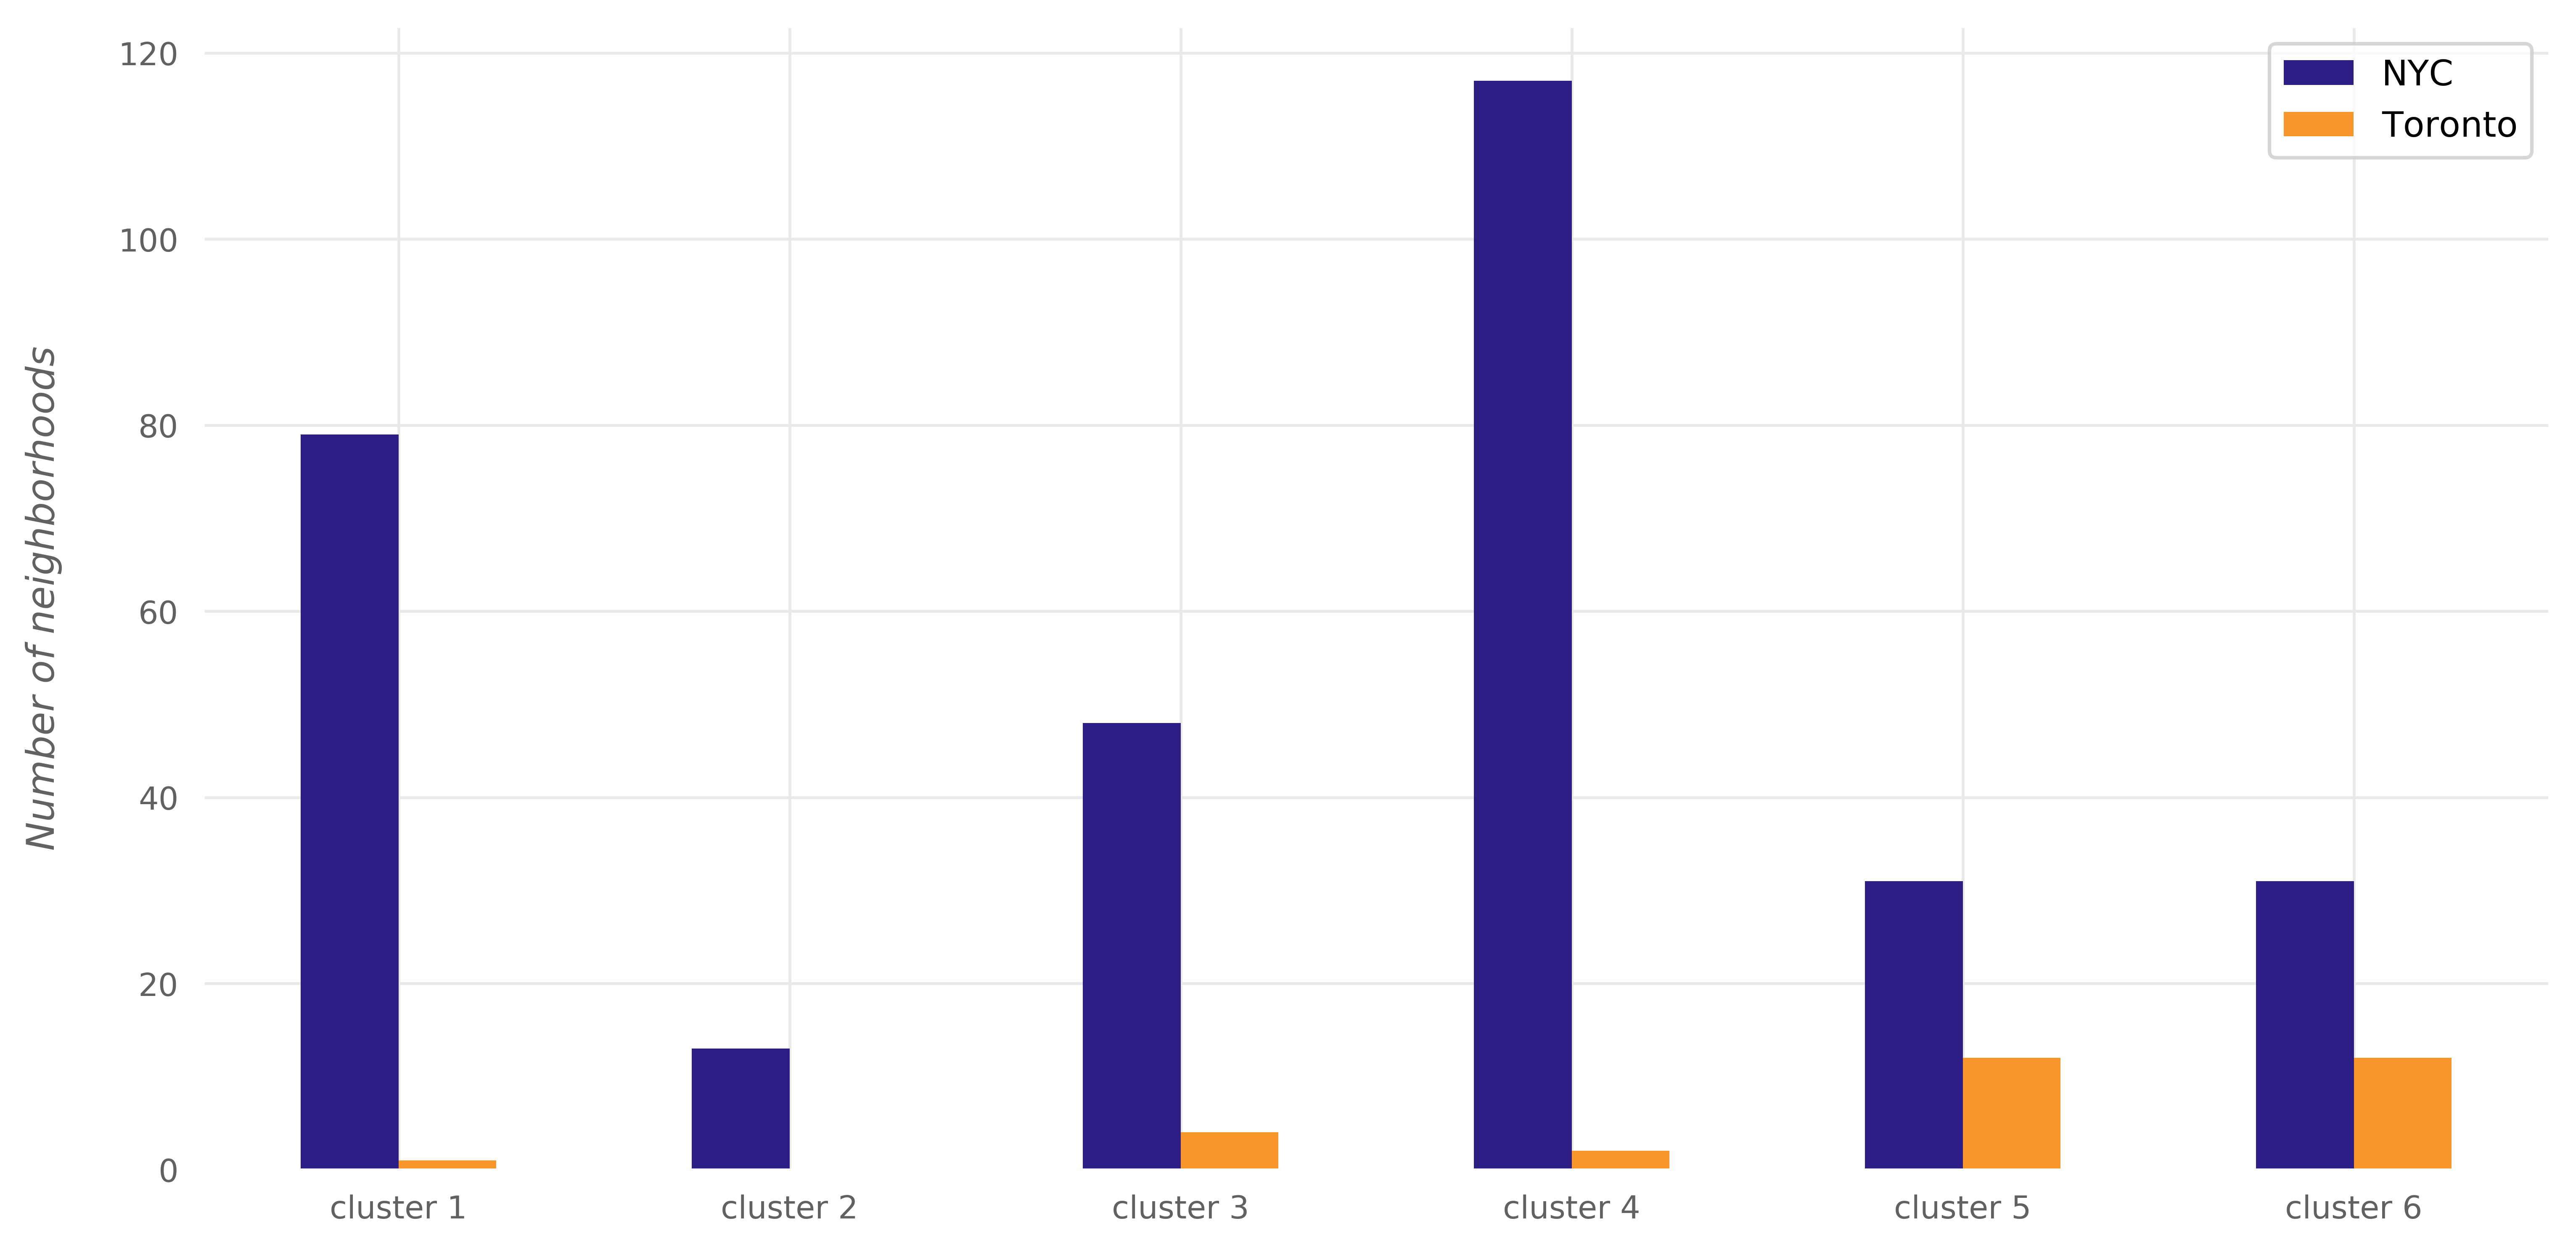

In [84]:
ind = ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5','cluster 6']
city_c_df = pd.DataFrame({
    'NYC': [x[0] for x in n_counts],
    'Toronto': [x[1] for x in n_counts]
}, index = ind)

fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
city_c_df.plot(kind='bar', color=['#2d1e86', '#f6962b'], rot=0, ax=ax)
plot_conf(ax, xlbl='', ylbl='Number of neighborhoods', t='')
fig.savefig('city-count.png', dpi=300)